# **Import Python Libraries**

In [16]:
import glob
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
#from fancyimpute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carpeta de datos
path_train = "Data/Train"
path_test = "Data/Test"

# **1. Load Data**

## **1.1. Checking ESP data 2019**

In [3]:
# Load esp data 2019
data_pump_2019 = pd.read_csv(path_train + "/high_freq_2019.csv")
data_pump_2019

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,PRESS_INTK,TEMP_INTK,WellFailure
0,DEEPWATER-000XAR,2019-02-25,72.42,4252.87,57.44,NaN,NaN,281.56,0.0,0.17,1443.97,222.71,NaN
1,DEEPWATER-000XAR,2019-02-26,72.77,4203.62,57.44,NaN,NaN,281.09,0.0,0.15,1414.84,222.80,NaN
2,DEEPWATER-000XAR,2019-02-27,72.29,4271.55,57.45,NaN,NaN,281.55,0.0,0.15,1449.17,222.72,NaN
3,DEEPWATER-000XAR,2019-03-03,72.25,4235.13,57.44,NaN,NaN,280.89,0.0,0.17,1432.86,222.72,NaN
4,DEEPWATER-000XAR,2019-03-04,71.97,4216.12,57.44,NaN,NaN,280.57,0.0,0.16,1425.79,222.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19114,DEEPWATER-ZSZCSG,2019-11-07,0.00,0.00,0.00,NaN,NaN,223.24,0.0,0.11,4127.67,223.00,NaN
19115,DEEPWATER-ZSZCSG,2019-11-08,0.00,0.00,0.00,NaN,NaN,223.20,0.0,0.11,4127.75,222.98,NaN
19116,DEEPWATER-ZSZCSG,2019-11-09,0.00,0.00,0.00,NaN,NaN,223.11,0.0,0.15,4125.95,222.84,NaN
19117,DEEPWATER-ZSZCSG,2019-11-10,0.00,0.00,0.00,NaN,NaN,223.12,0.0,0.11,4126.17,222.79,NaN


In [4]:
data_pump_2019.isna().sum()

WELL_ID            0
DATE               0
CURRENT            0
PRESS_DESC         0
FREQUENCY          0
PRESS_INT      19119
TEMP_INT       19119
TEMP_MOT           0
OUT_VOLT           0
VIBRATION          0
PRESS_INTK         0
TEMP_INTK          0
WellFailure    19071
dtype: int64

In [5]:
# Drop columns PRESS_INT and TEMP_INT
data_pump_2019.drop(['PRESS_INT', 'TEMP_INT'], axis=1, inplace=True)
data_pump_2019

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,TEMP_MOT,OUT_VOLT,VIBRATION,PRESS_INTK,TEMP_INTK,WellFailure
0,DEEPWATER-000XAR,2019-02-25,72.42,4252.87,57.44,281.56,0.0,0.17,1443.97,222.71,NaN
1,DEEPWATER-000XAR,2019-02-26,72.77,4203.62,57.44,281.09,0.0,0.15,1414.84,222.80,NaN
2,DEEPWATER-000XAR,2019-02-27,72.29,4271.55,57.45,281.55,0.0,0.15,1449.17,222.72,NaN
3,DEEPWATER-000XAR,2019-03-03,72.25,4235.13,57.44,280.89,0.0,0.17,1432.86,222.72,NaN
4,DEEPWATER-000XAR,2019-03-04,71.97,4216.12,57.44,280.57,0.0,0.16,1425.79,222.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19114,DEEPWATER-ZSZCSG,2019-11-07,0.00,0.00,0.00,223.24,0.0,0.11,4127.67,223.00,NaN
19115,DEEPWATER-ZSZCSG,2019-11-08,0.00,0.00,0.00,223.20,0.0,0.11,4127.75,222.98,NaN
19116,DEEPWATER-ZSZCSG,2019-11-09,0.00,0.00,0.00,223.11,0.0,0.15,4125.95,222.84,NaN
19117,DEEPWATER-ZSZCSG,2019-11-10,0.00,0.00,0.00,223.12,0.0,0.11,4126.17,222.79,NaN


## **1.2. Load production data**

In [6]:
prod_train= pd.read_csv(path_train + "/production_train.csv", parse_dates=[1])
prod_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WELL_ID         14508 non-null  object 
 1   DATE            14508 non-null  object 
 2   BFPD            14503 non-null  float64
 3   BOPD            14462 non-null  float64
 4   BWPD            14504 non-null  float64
 5   MSCF            14484 non-null  float64
 6   BSW             14504 non-null  float64
 7   GOR(MSFC/BPPD)  14508 non-null  float64
 8   GLR(SCF/BFPD)   14508 non-null  float64
 9   API             14359 non-null  float64
 10  FREC(Hz)        9832 non-null   float64
 11  PIP(PSI)        9171 non-null   float64
 12  PROF_INTAKE     10200 non-null  float64
 13  AMPERAGE        11305 non-null  float64
 14  PUMP            14508 non-null  object 
 15  PSI_CAB         14308 non-null  float64
dtypes: float64(13), object(3)
memory usage: 1.8+ MB


In [7]:
len(prod_train.WELL_ID.unique())

99

## **1.3. Checking ESP data January 2020**

In [8]:
data_jan = pd.read_csv(path_train + "/2020_01_JAN.csv")
data_jan.head()

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,PRESS_INTK,TEMP_INTK,WellFailure
0,DEEPWATER-VVBMZ0,2020-01-01 00:00:00,4.480000,2659.0600,0.55,NaN,NaN,105.57000,0.00000,2.550000,1966.8,80.64,yes
1,DEEPWATER-VKCG0Y,2020-01-01 08:00:31,24.799999,4172.1997,54.00,460.50000,235.39999,279.09998,425.10001,0.200136,NaN,NaN,NaN
2,DEEPWATER-HOQZS1,2020-01-01 08:01:14,39.200001,4008.9998,59.00,354.20001,223.50000,280.19998,459.89999,NaN,NaN,NaN,NaN
3,DEEPWATER-IXZFOT,2020-01-01 08:01:54,20.900000,3996.2000,133.00,518.39996,243.50000,319.10001,304.00000,NaN,NaN,NaN,NaN
4,DEEPWATER-3PEB5I,2020-01-01 08:02:22,NaN,3742.3000,NaN,NaN,232.20000,276.39999,NaN,NaN,NaN,NaN,NaN


In [9]:
data_jan.isna().sum()

WELL_ID             0
DATE                0
CURRENT         58352
PRESS_DESC      11763
FREQUENCY       38613
PRESS_INT       14762
TEMP_INT        21629
TEMP_MOT        12167
OUT_VOLT       100719
VIBRATION       53354
PRESS_INTK     173075
TEMP_INTK      173075
WellFailure    173065
dtype: int64

## **1.4. Load Train and Test ESP data 2019-2021**

In [11]:
## Directory train files
files_train = glob.glob(path_train + "/*.csv")
files_train[:-1]

['Data/Train\\2020_01_JAN.csv',
 'Data/Train\\2020_02_FEB.csv',
 'Data/Train\\2020_03_MAR.csv',
 'Data/Train\\2020_04_APR.csv',
 'Data/Train\\2020_05_MAY.csv',
 'Data/Train\\2020_06_JUN.csv',
 'Data/Train\\2020_07_JUL.csv',
 'Data/Train\\2020_08_AUG.csv',
 'Data/Train\\2020_09_SEP.csv',
 'Data/Train\\2020_10_OCT.csv',
 'Data/Train\\2020_11_NOV.csv',
 'Data/Train\\2020_12_DEC.csv',
 'Data/Train\\2021_01_JAN.csv',
 'Data/Train\\2021_02_FEB.csv',
 'Data/Train\\2021_03_MAR.csv',
 'Data/Train\\2021_04_APR.csv',
 'Data/Train\\2021_05_MAY.csv',
 'Data/Train\\high_freq_2019.csv']

In [33]:
# Directory test files
files_test = glob.glob(path_test + "/*.csv")
files_test[:-1]

['Data/Test\\2020_01_JAN.csv',
 'Data/Test\\2020_02_FEB.csv',
 'Data/Test\\2020_03_MAR.csv',
 'Data/Test\\2020_04_APR.csv',
 'Data/Test\\2020_05_MAY.csv',
 'Data/Test\\2020_06_JUN.csv',
 'Data/Test\\2020_07_JUL.csv',
 'Data/Test\\2020_08_AUG.csv',
 'Data/Test\\2020_09_SEP.csv',
 'Data/Test\\2020_10_OCT.csv',
 'Data/Test\\2020_11_NOV.csv',
 'Data/Test\\2020_12_DEC.csv',
 'Data/Test\\2021_01_JAN.csv',
 'Data/Test\\2021_02_FEB.csv',
 'Data/Test\\2021_03_MAR.csv',
 'Data/Test\\2021_04_APR.csv',
 'Data/Test\\2021_05_MAY.csv',
 'Data/Test\\high_freq_2019.csv']

In [14]:
# Merge Frequency Files
def concat_data(files):
    
    dataframes = [pd.read_csv(file, parse_dates=[1]) for file in files]
    return pd.concat(dataframes,axis=0).reset_index(drop=True)

In [23]:
# Concat High Frequency Data
train_esp = concat_data(files_train[:-1])
test_esp = concat_data(files_test[:-1])

In [24]:
train_esp

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,PRESS_INTK,TEMP_INTK,WellFailure
0,DEEPWATER-VVBMZ0,2020-01-01 00:00:00,4.480000,2659.0600,0.55,NaN,NaN,105.57000,0.00000,2.550000,1966.80,80.64,yes
1,DEEPWATER-VKCG0Y,2020-01-01 08:00:31,24.799999,4172.1997,54.00,460.50000,235.39999,279.09998,425.10001,0.200136,NaN,NaN,NaN
2,DEEPWATER-HOQZS1,2020-01-01 08:01:14,39.200001,4008.9998,59.00,354.20001,223.50000,280.19998,459.89999,NaN,NaN,NaN,NaN
3,DEEPWATER-IXZFOT,2020-01-01 08:01:54,20.900000,3996.2000,133.00,518.39996,243.50000,319.10001,304.00000,NaN,NaN,NaN,NaN
4,DEEPWATER-3PEB5I,2020-01-01 08:02:22,NaN,3742.3000,NaN,NaN,232.20000,276.39999,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7866952,DEEPWATER-ZSZCSG,2019-11-07 00:00:00,0.000000,0.0000,0.00,NaN,NaN,223.24000,0.00000,0.110000,4127.67,223.00,NaN
7866953,DEEPWATER-ZSZCSG,2019-11-08 00:00:00,0.000000,0.0000,0.00,NaN,NaN,223.20000,0.00000,0.110000,4127.75,222.98,NaN
7866954,DEEPWATER-ZSZCSG,2019-11-09 00:00:00,0.000000,0.0000,0.00,NaN,NaN,223.11000,0.00000,0.150000,4125.95,222.84,NaN
7866955,DEEPWATER-ZSZCSG,2019-11-10 00:00:00,0.000000,0.0000,0.00,NaN,NaN,223.12000,0.00000,0.110000,4126.17,222.79,NaN


In [25]:
# Make a copy of pump data
esp_train = train_esp.copy()

In [26]:
# Merge both columns: PRESS_INT and PRESS_INTK - TEMP_INT and TEMP_INTK
esp_train['PRESS_INT'] = esp_train['PRESS_INT'].fillna(esp_train['PRESS_INTK'])
esp_train['TEMP_INT'] = esp_train['TEMP_INT'].fillna(esp_train['TEMP_INTK'])

In [27]:
esp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7866957 entries, 0 to 7866956
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  PRESS_INTK   float64       
 11  TEMP_INTK    float64       
 12  WellFailure  object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 780.3+ MB


In [28]:
# Count null values
esp_train.isna().sum()

WELL_ID              0
DATE                 0
CURRENT         496585
PRESS_DESC      533143
FREQUENCY       313068
PRESS_INT       256490
TEMP_INT        386948
TEMP_MOT        291044
OUT_VOLT       7512093
VIBRATION       581164
PRESS_INTK     7847837
TEMP_INTK      7847837
WellFailure    7866846
dtype: int64

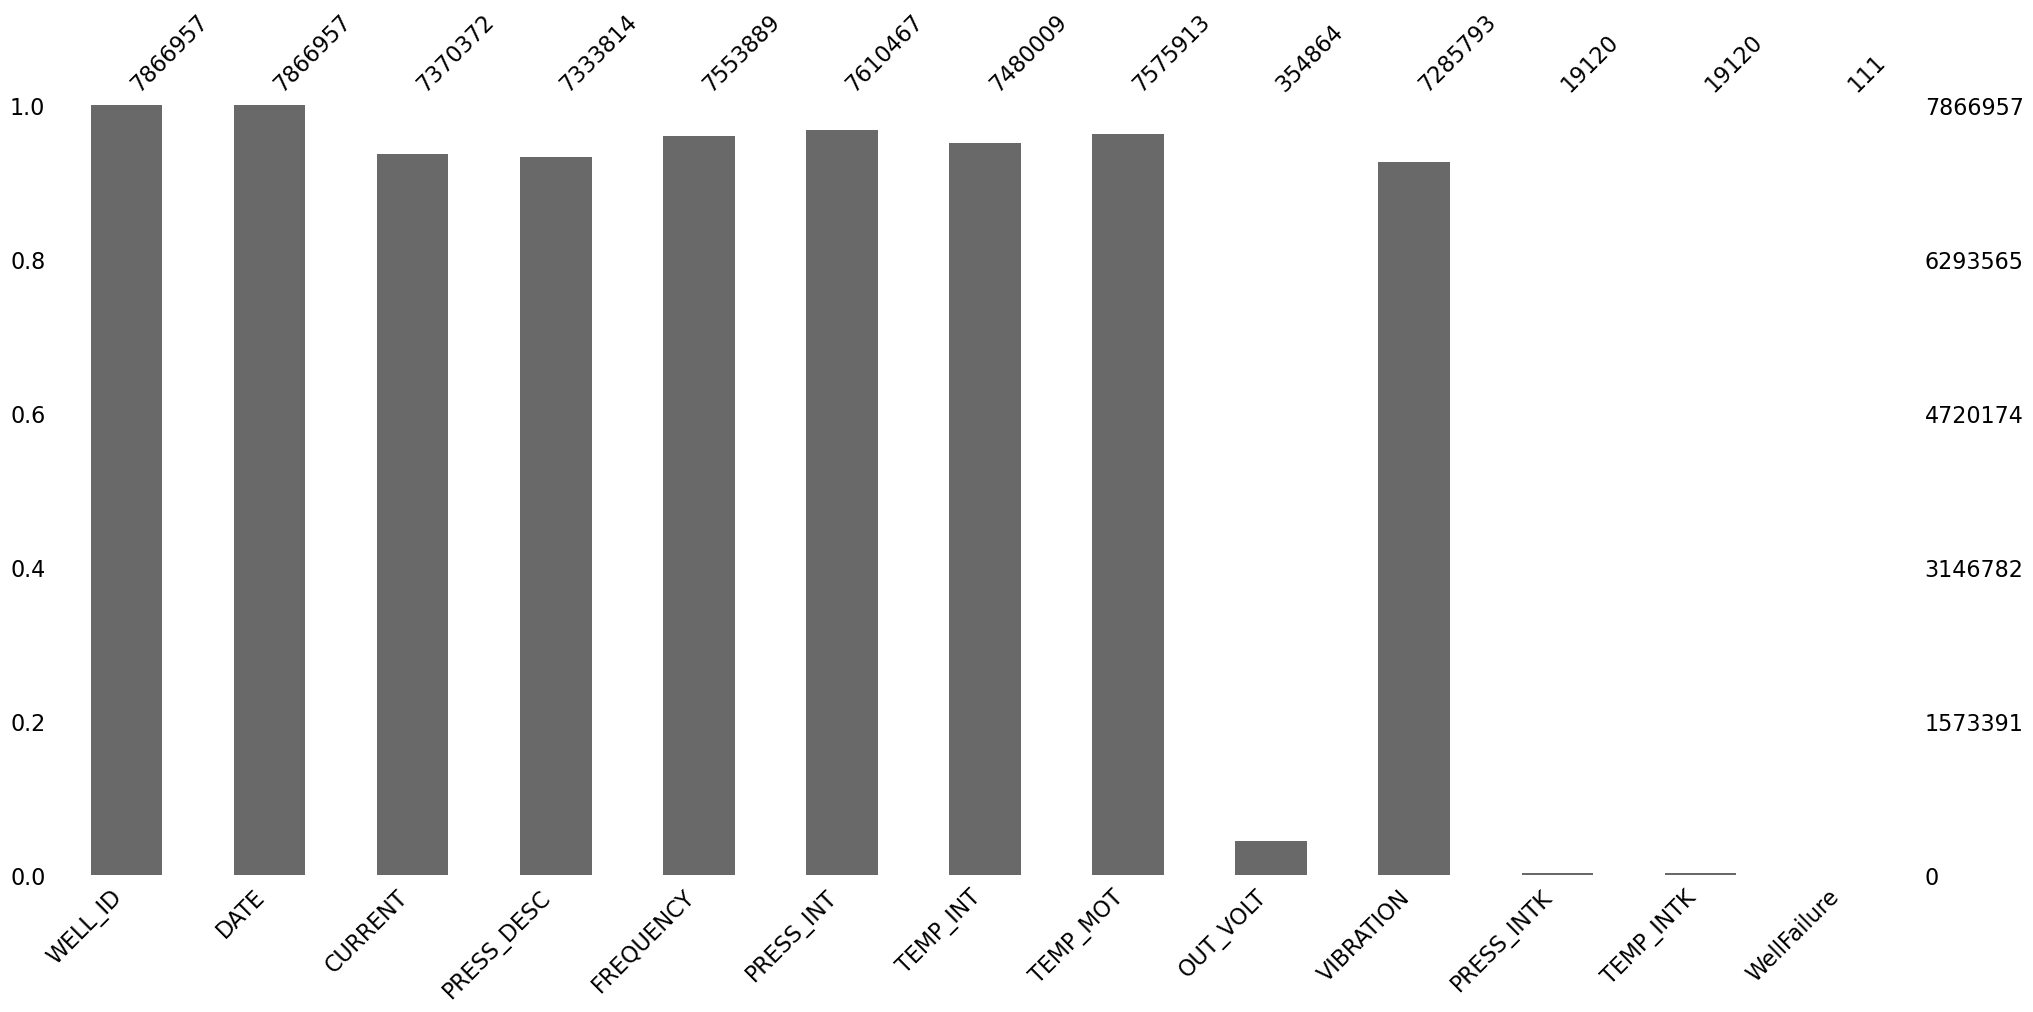

In [30]:
# Visualizing null values
msno.bar(esp_train)
plt.show()

In [31]:
# Drop PRESS_INTK and TEMP_INTK columns
esp_train.drop(['PRESS_INTK', 'TEMP_INTK'], axis=1, inplace=True)

In [32]:
# Checking number of wells
len(esp_train['WELL_ID'].unique())

100

---

In [35]:
# Make a copy of the test data
esp_test = test_esp.copy()

In [36]:
# Merge both columns: PRESS_INT and PRESS_INTK - TEMP_INT and TEMP_INTK
esp_test['PRESS_INT'] = esp_test['PRESS_INT'].fillna(esp_test['PRESS_INTK'])
esp_test['TEMP_INT'] = esp_test['TEMP_INT'].fillna(esp_test['TEMP_INTK'])

In [37]:
esp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143020 entries, 0 to 1143019
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   WELL_ID      1143020 non-null  object        
 1   DATE         1143020 non-null  datetime64[ns]
 2   CURRENT      1081076 non-null  float64       
 3   PRESS_DESC   988449 non-null   float64       
 4   FREQUENCY    1108460 non-null  float64       
 5   PRESS_INT    1075544 non-null  float64       
 6   TEMP_INT     1059757 non-null  float64       
 7   TEMP_MOT     1076759 non-null  float64       
 8   OUT_VOLT     45406 non-null    float64       
 9   VIBRATION    1018841 non-null  float64       
 10  PRESS_INTK   3628 non-null     float64       
 11  TEMP_INTK    3628 non-null     float64       
 12  WellFailure  0 non-null        float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 113.4+ MB


In [38]:
# Counting null values
esp_test.isna().sum()

WELL_ID              0
DATE                 0
CURRENT          61944
PRESS_DESC      154571
FREQUENCY        34560
PRESS_INT        67476
TEMP_INT         83263
TEMP_MOT         66261
OUT_VOLT       1097614
VIBRATION       124179
PRESS_INTK     1139392
TEMP_INTK      1139392
WellFailure    1143020
dtype: int64

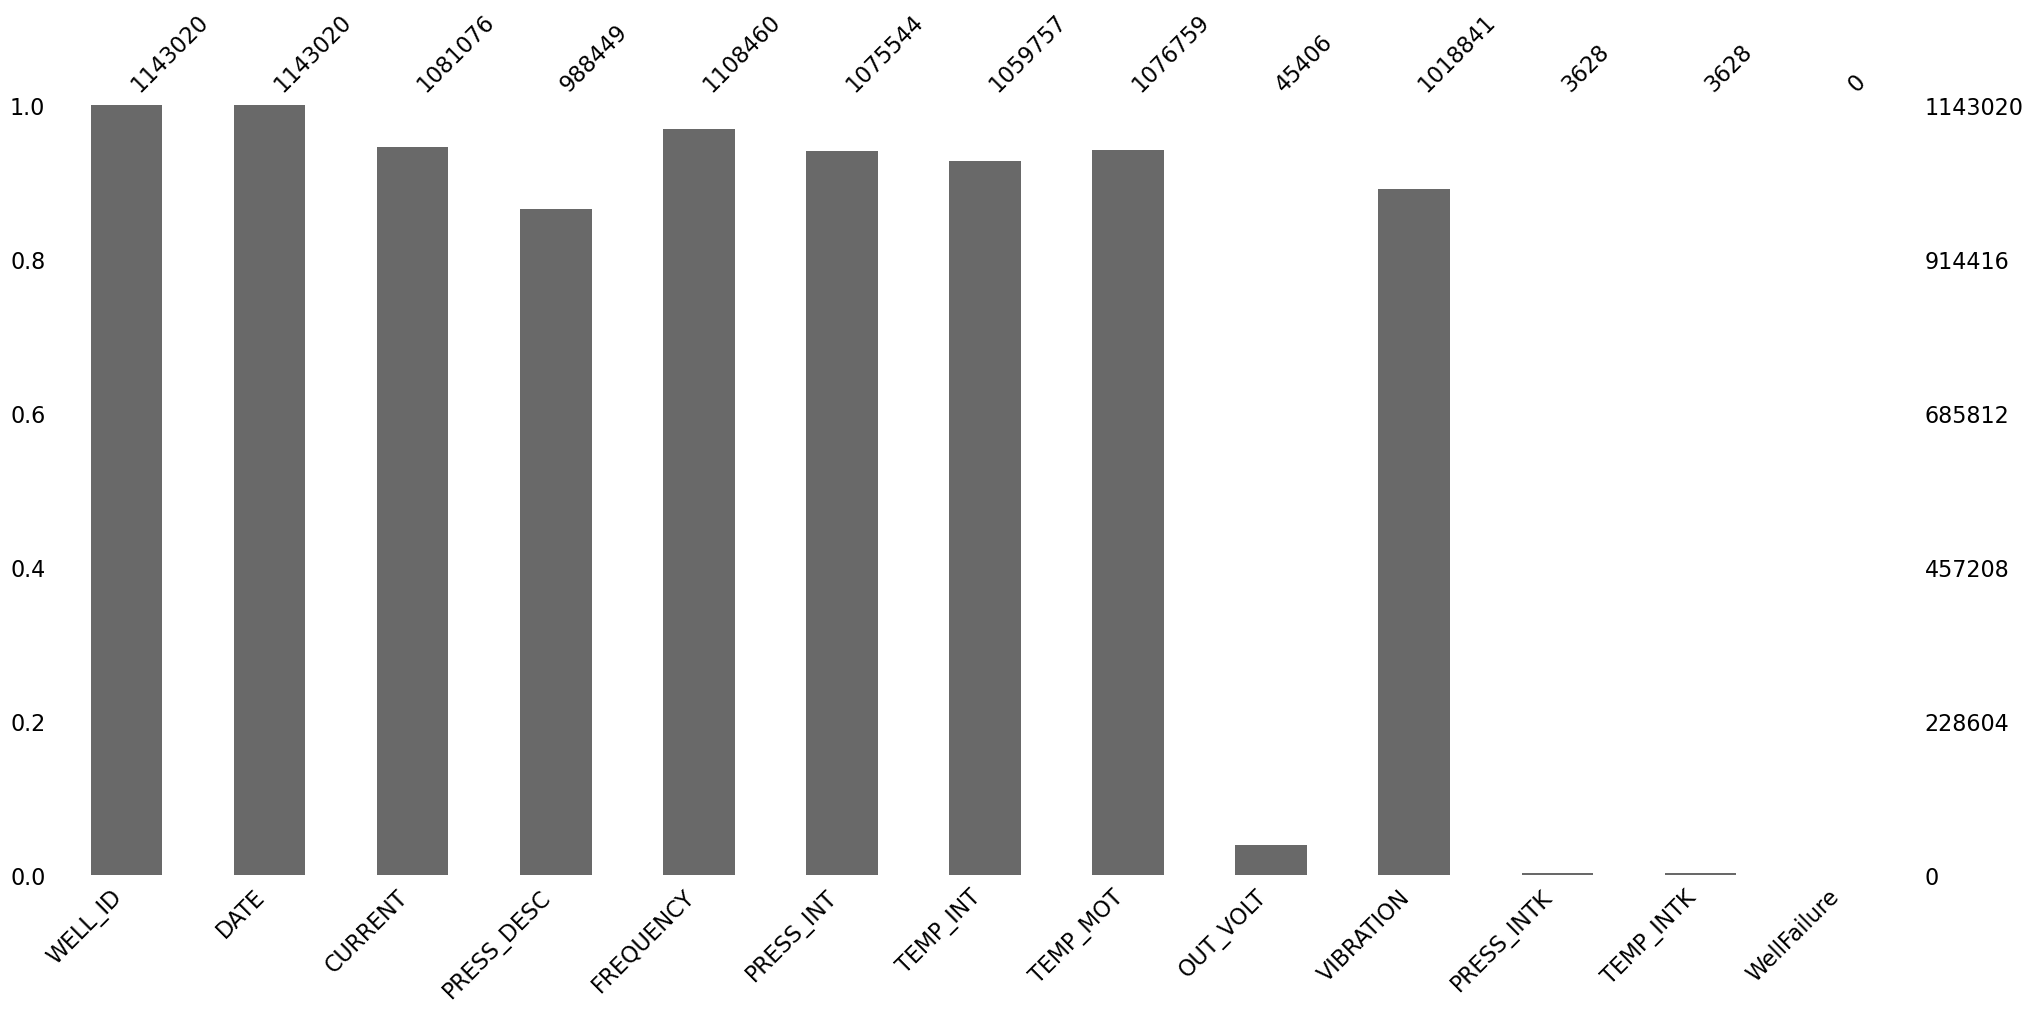

In [39]:
# Visualizing null values in the test set
msno.bar(esp_test)
plt.show()

---

In [40]:
# Drop columns PRESS_INTK and TEMP_INTK
esp_test.drop(['PRESS_INTK', 'TEMP_INTK'], axis=1, inplace=True)

In [41]:
# Checking number of wells
len(esp_test['WELL_ID'].unique())

15

## **1.5. Load Well Locations Data**

In [42]:
well_locations = pd.read_csv("Data/well_locations.csv")
well_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WELL_ID  115 non-null    object 
 1   lat      115 non-null    float64
 2   lon      115 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


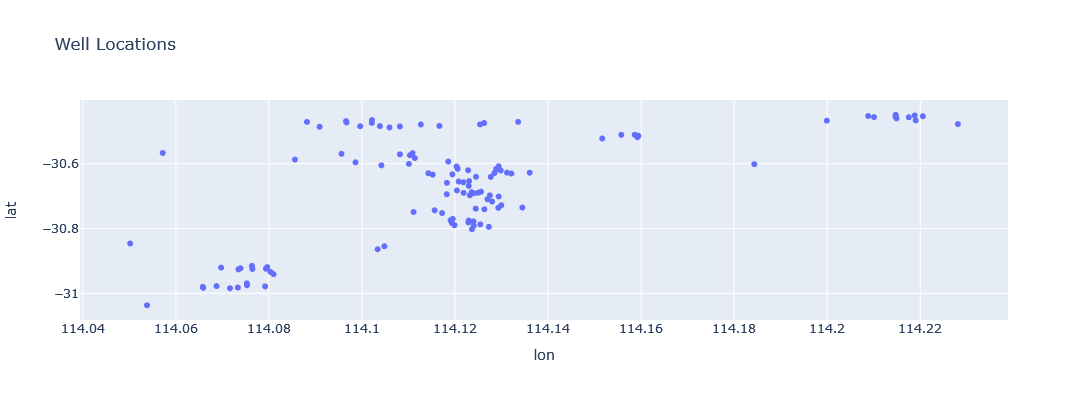

In [44]:
# Plotting well locations
fig = px.scatter(well_locations, x='lon', y='lat', hover_data=['WELL_ID'], title='Well locations')
fig.update_layout(
    width = 1200,
    height = 400,
    title = "Well Locations")

fig.show()

# **2. Exploratory data analysis**

## **2.1. Boxplots ESP train data**

In [45]:
# ESP data
esp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7866957 entries, 0 to 7866956
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 660.2+ MB


In [47]:
esp_train.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,7866957,2020-10-17 14:12:43.863721984,2019-02-25 00:00:00,2020-08-11 12:31:00,2020-10-14 19:02:00,2021-01-03 05:03:35,2021-05-25 09:28:53,NaN
CURRENT,7370372.0,36.429865,0.0,22.0,33.0,54.0,51970.0,29.104395
PRESS_DESC,7333814.0,3587.021914,-3276.0,3650.0,3952.3,4123.0,94906.9,2130.708516
FREQUENCY,7553889.0,57.09056,0.0,53.0,56.0,60.0,5051.0,26.831815
PRESS_INT,7610467.0,1233.715153,0.0,259.0,362.0,722.0,189813.796,7865.707366
TEMP_INT,7480009.0,295.235469,-3180.4,226.0,230.0,235.0,11827.0,917.426733
TEMP_MOT,7575913.0,275.791108,-17.78,267.0,283.59998,296.0,6553.5,146.389727
OUT_VOLT,354864.0,336.477454,0.0,378.20001,433.89999,458.60001,953.0,186.673191
VIBRATION,7285793.0,261.849375,0.0,0.0,0.0,0.0,65535.0,4127.618675


In [48]:
# Counting null values
esp_train.isna().sum()

WELL_ID              0
DATE                 0
CURRENT         496585
PRESS_DESC      533143
FREQUENCY       313068
PRESS_INT       256490
TEMP_INT        386948
TEMP_MOT        291044
OUT_VOLT       7512093
VIBRATION       581164
WellFailure    7866846
dtype: int64

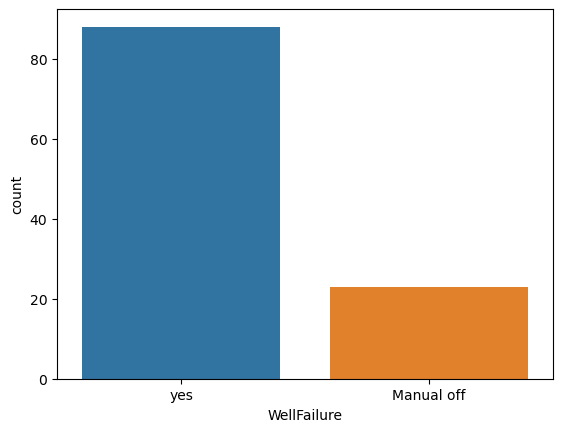

In [49]:
# Checking ESP Failures
sns.countplot(data=esp_train, x='WellFailure')
plt.show()

In [52]:
# Create function to make a boxplot
def box_plot(df, x, y, ylim=None):
    fig, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(data=df, x=x, y=y)
    
    # Set y-axis limits if provided
    if ylim:
        ax.set_ylim(0, ylim)
    
    plt.xticks(rotation=90)
    plt.show()

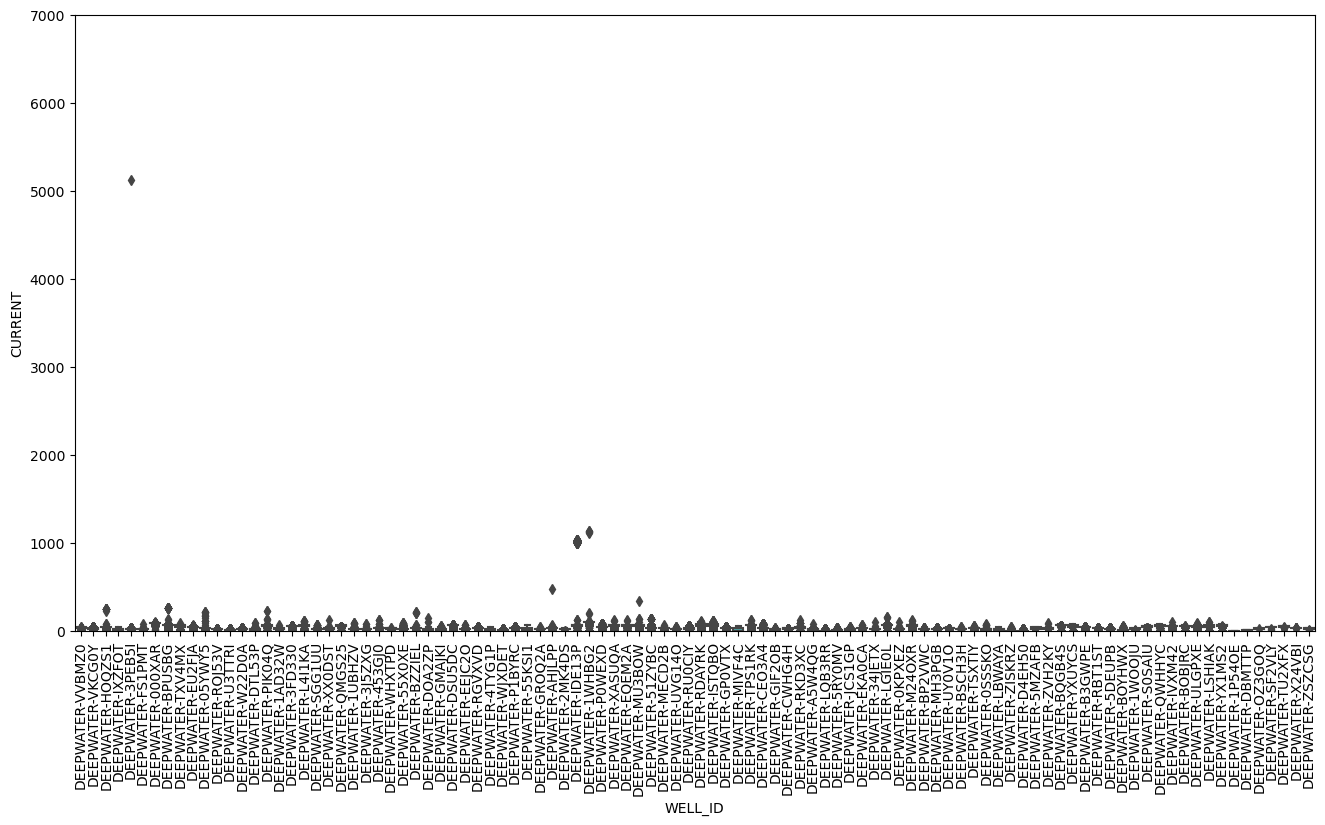

In [ ]:
# Current variable 
box_plot(esp_train, 'WELL_ID', 'CURRENT', 7000)
# considerar valores de corriente entre 0 y 100
#--'DEEPWATER-1WHBG2', 'DEEPWATER-HOQZS1', 'DEEPWATER-BPUSBG',
#'DEEPWATER-BZZIEL', --'DEEPWATER-MU3BOW', 'DEEPWATER-PIK04Q',
#--'DEEPWATER-IDE13P', 'DEEPWATER-LGIE0L', --'DEEPWATER-AHJLPP',
#'DEEPWATER-EQEM2A', --'DEEPWATER-3PEB5I', 'DEEPWATER-05YWY5'

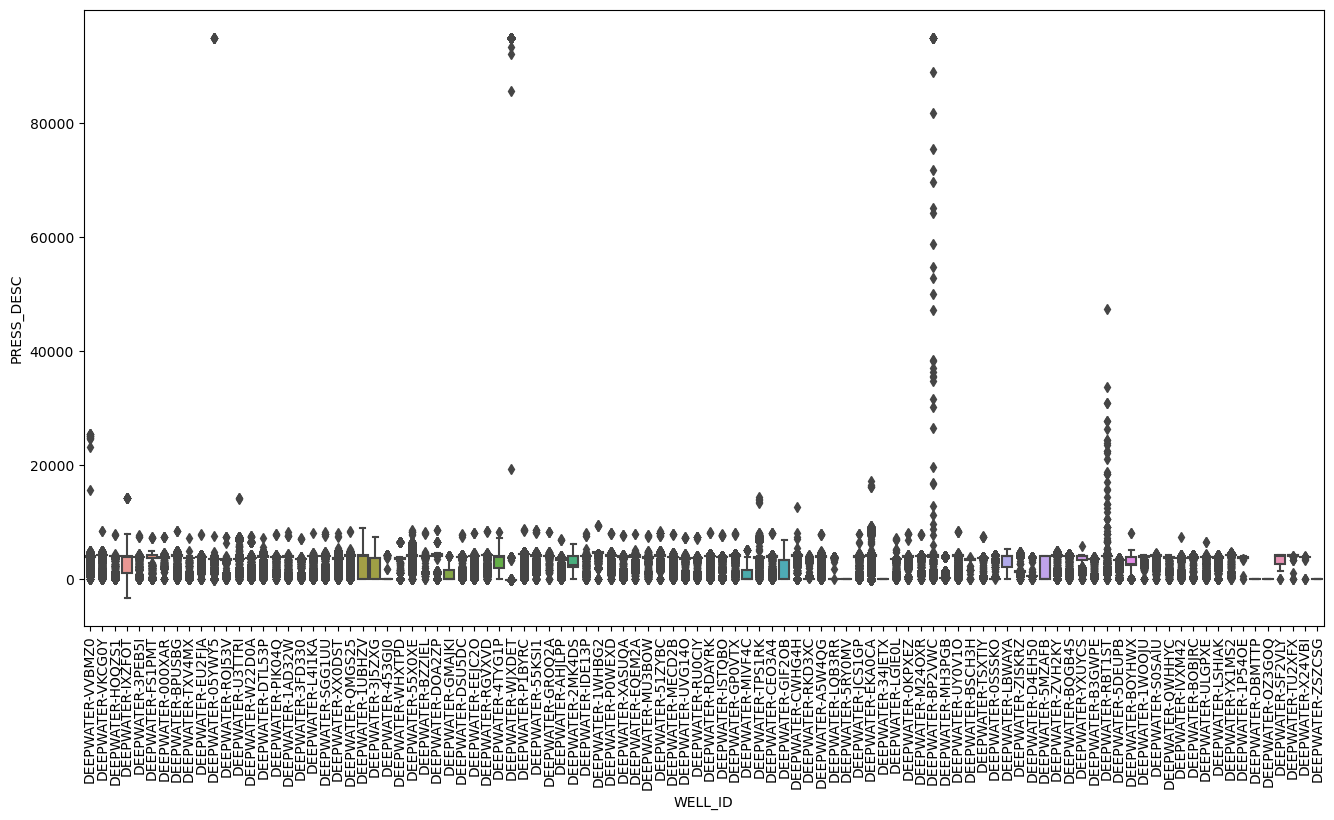

In [58]:
# Boxplot: Descharge pressure variable
box_plot(esp_train, 'WELL_ID', 'PRESS_DESC')
#considerar valores hasta 4500


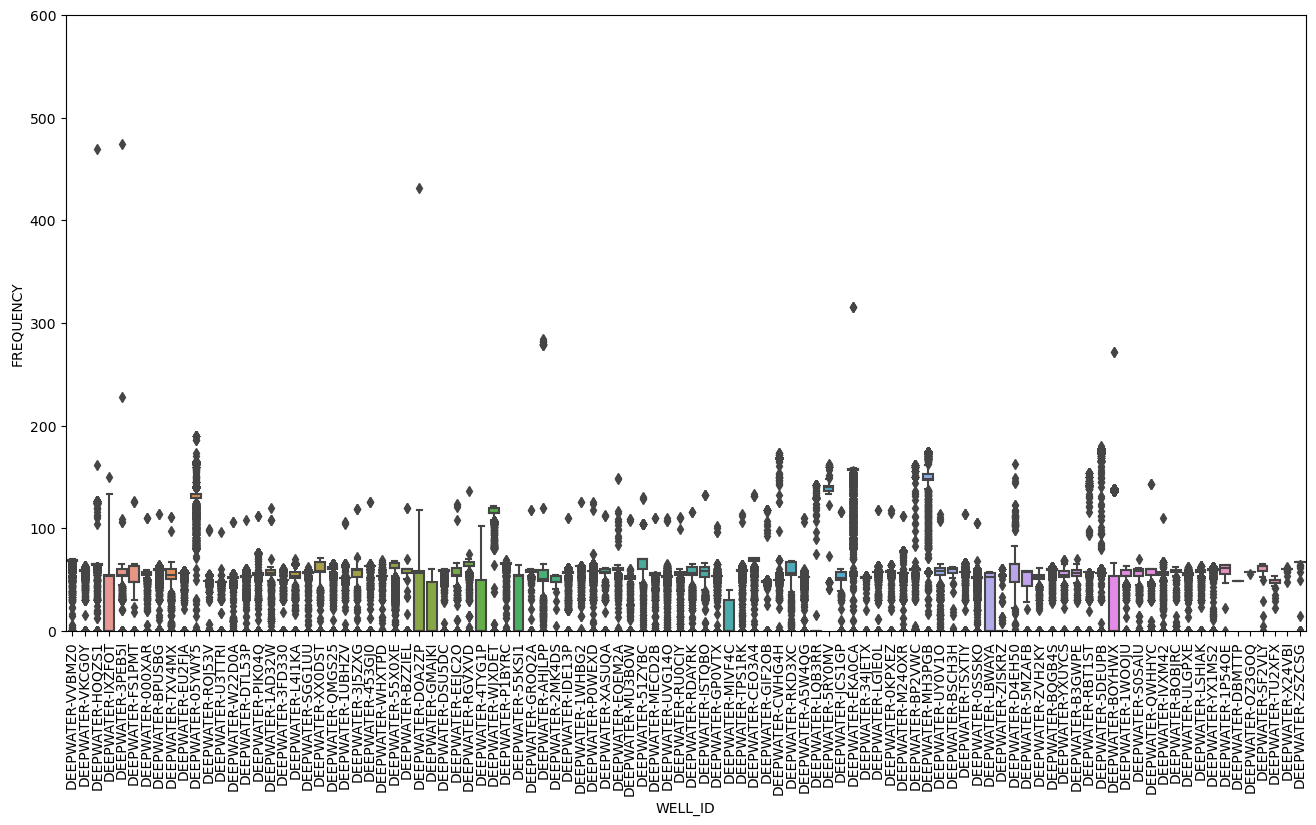

In [61]:
# Boxplot: frequency variable
box_plot(esp_train, 'WELL_ID', 'FREQUENCY', 600) 
# considerar valores de frecuencia hasta 65 hz

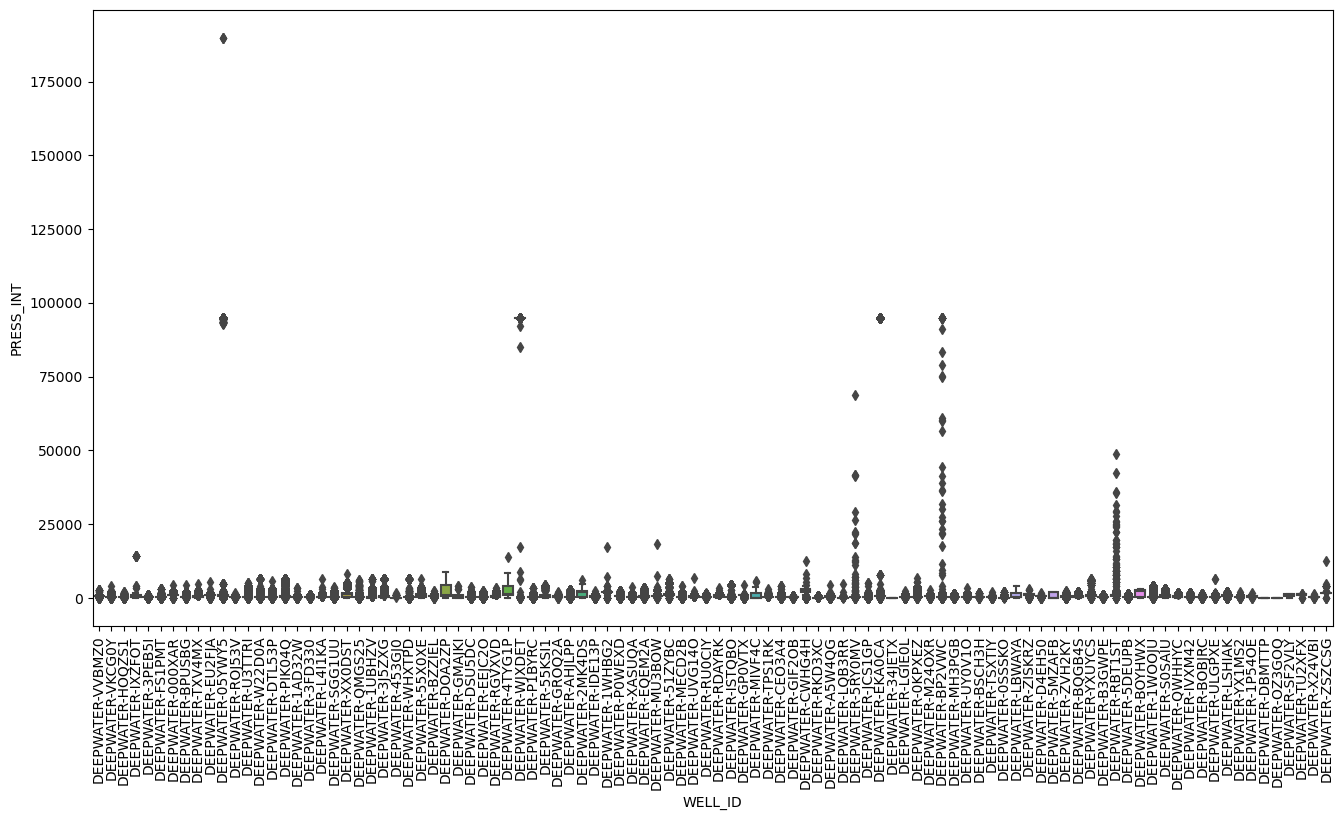

In [62]:
# Boxplot: intake pressure
box_plot(esp_train, 'WELL_ID', 'PRESS_INT')
# valores hasta 4500

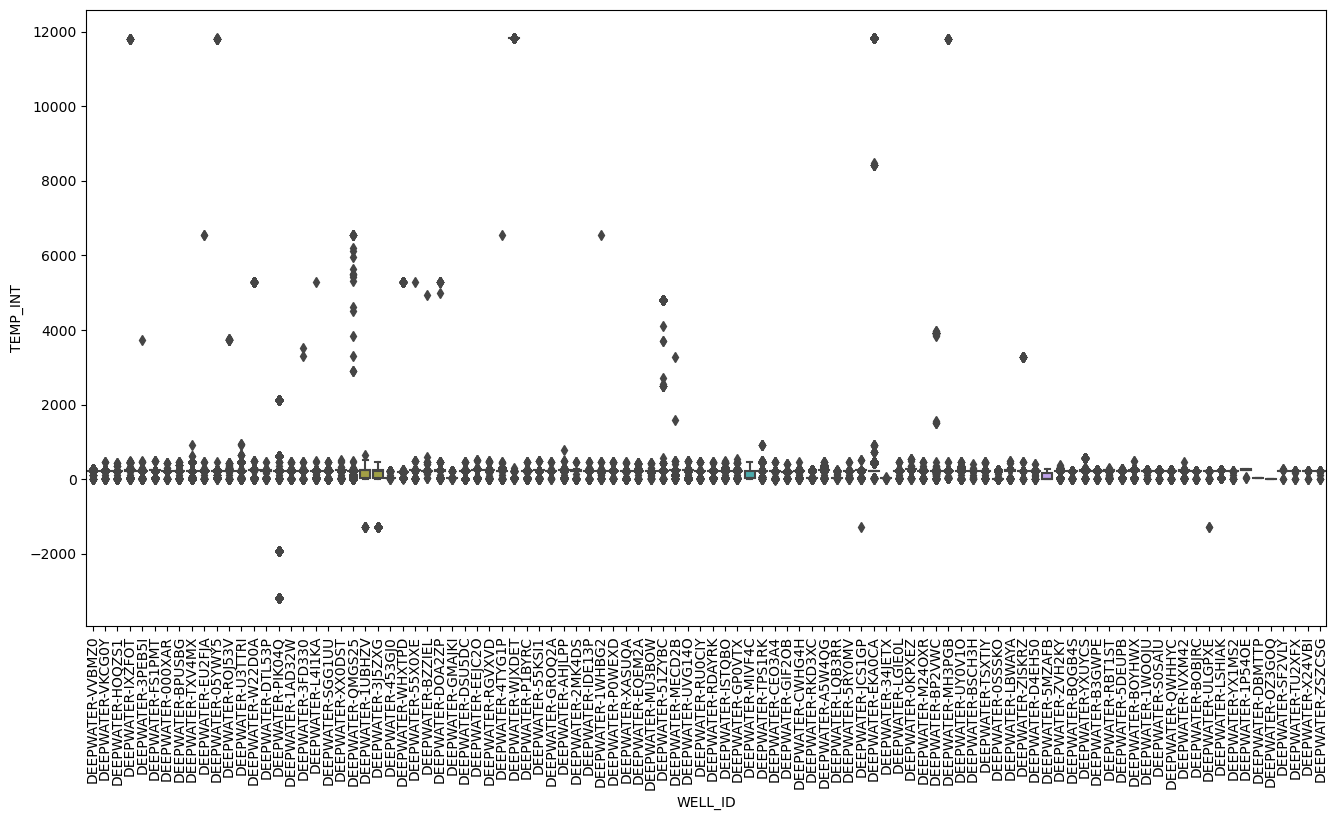

In [63]:
# Boxplot: intake temperature
box_plot(esp_train, 'WELL_ID', 'TEMP_INT')
# valores de temperatura hasta 300

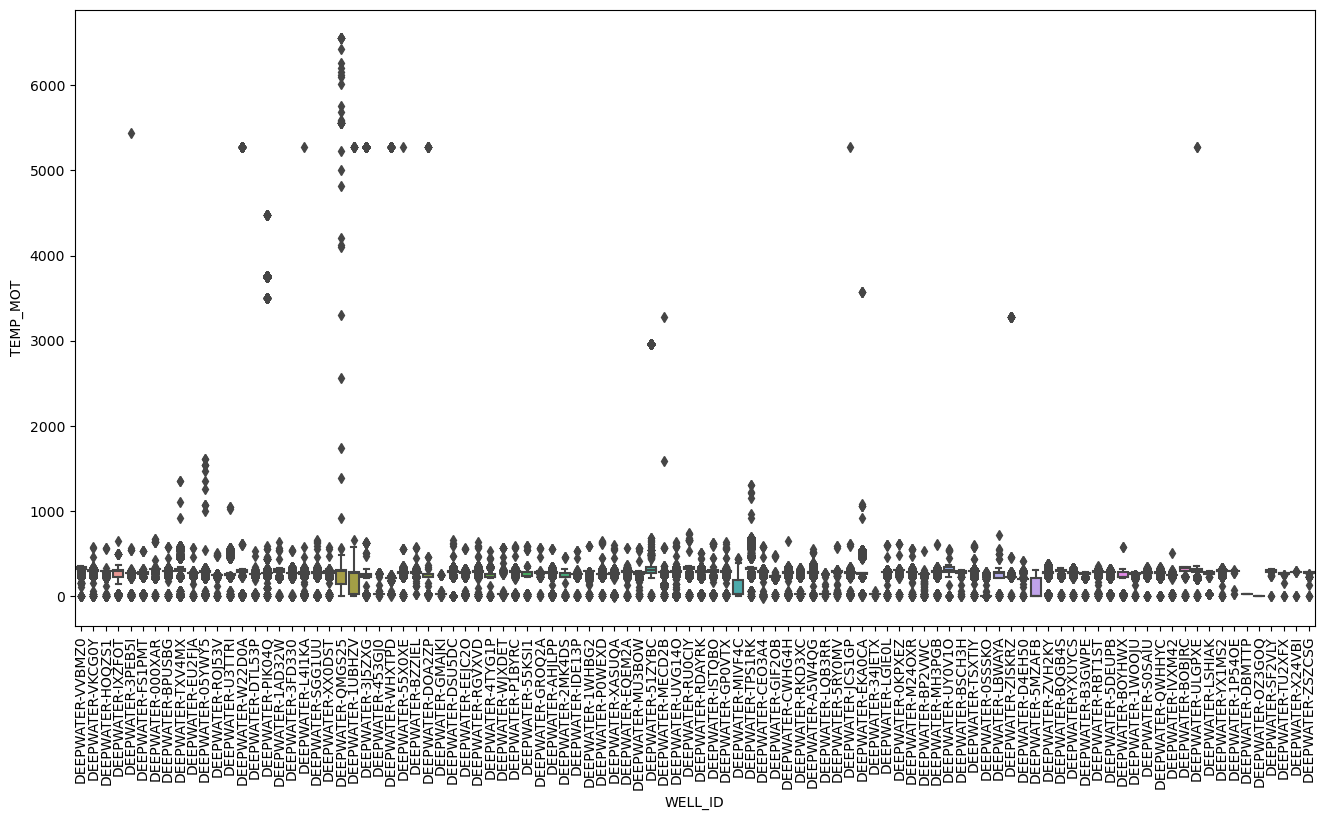

In [64]:
# Boxplot: motor temperature
box_plot(esp_train, 'WELL_ID', 'TEMP_MOT')
# valores hasta 350

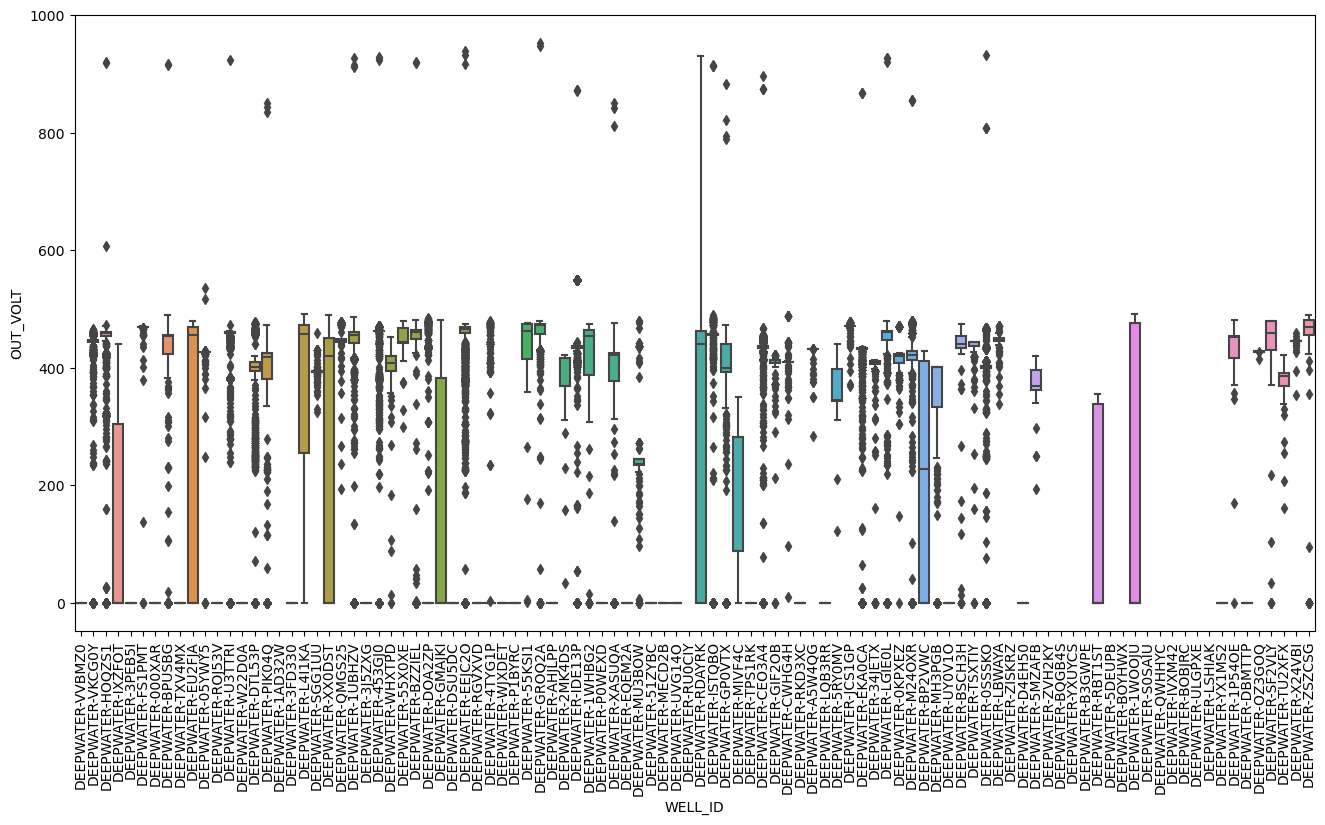

In [65]:
# Boxplot: motor temperature
box_plot(esp_train, 'WELL_ID', 'OUT_VOLT')
# podria considerarse hasta 480

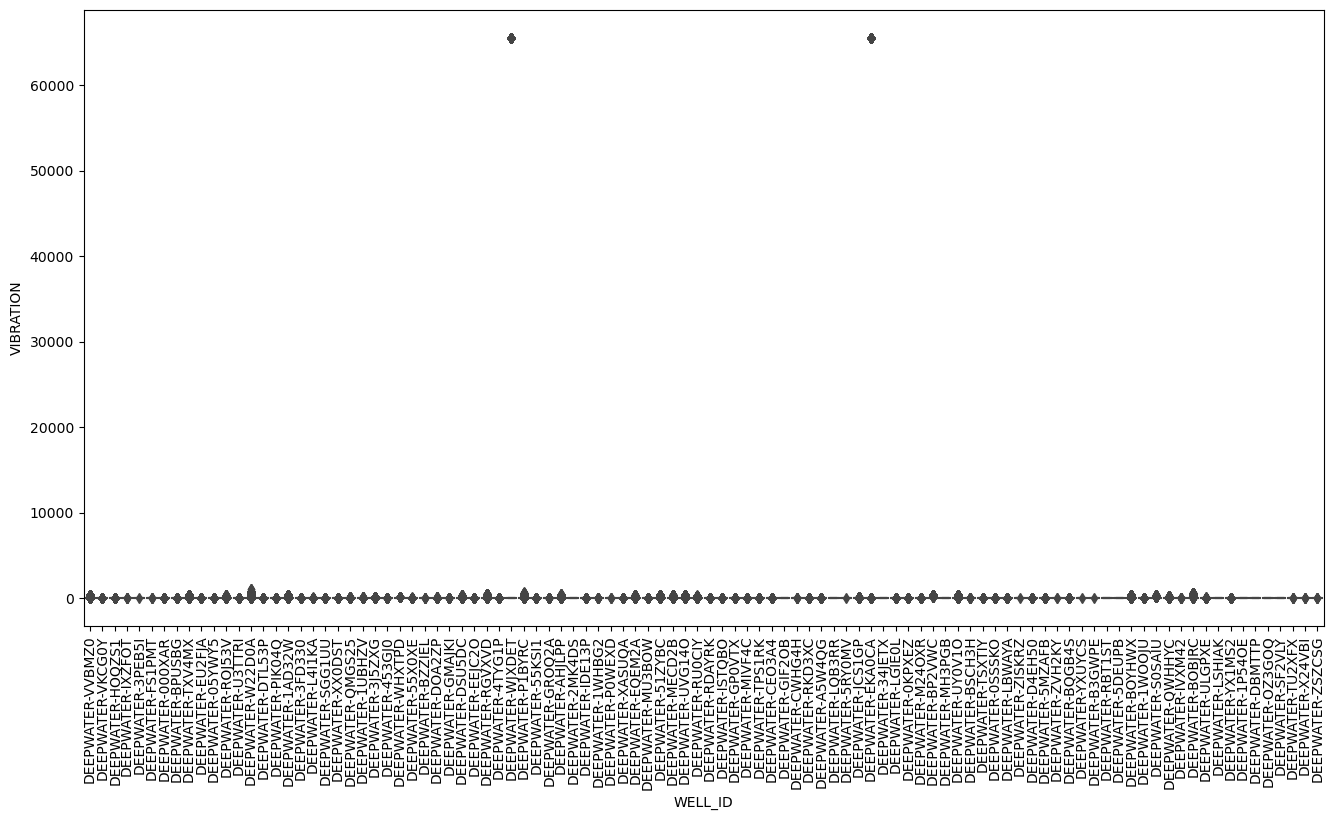

In [68]:
# Boxplot: motor temperature
box_plot(esp_train, 'WELL_ID', 'VIBRATION')
# considerar hasta 5

## **2.2. Boxplots ESP test data**

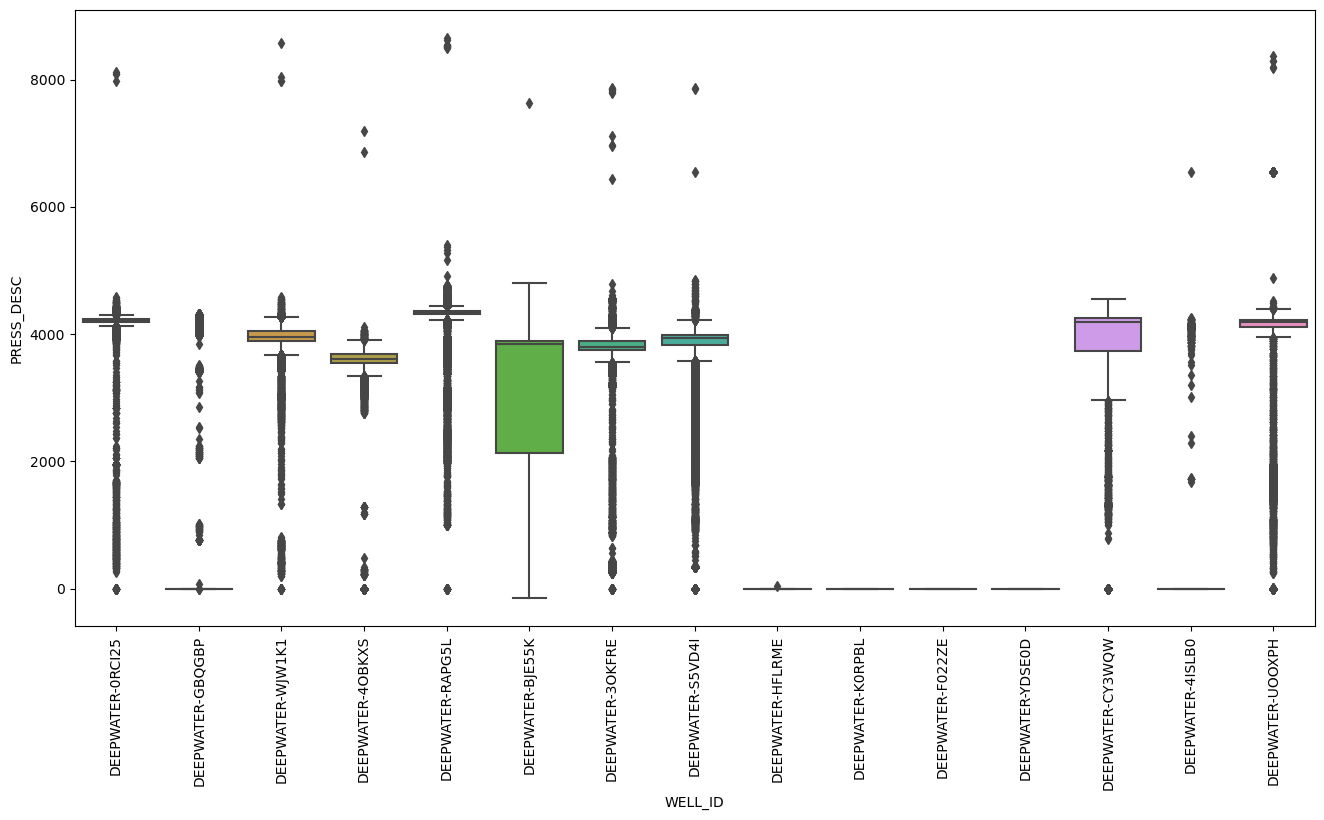

In [69]:
# Current variable 
box_plot(esp_test, 'WELL_ID', 'PRESS_DESC')

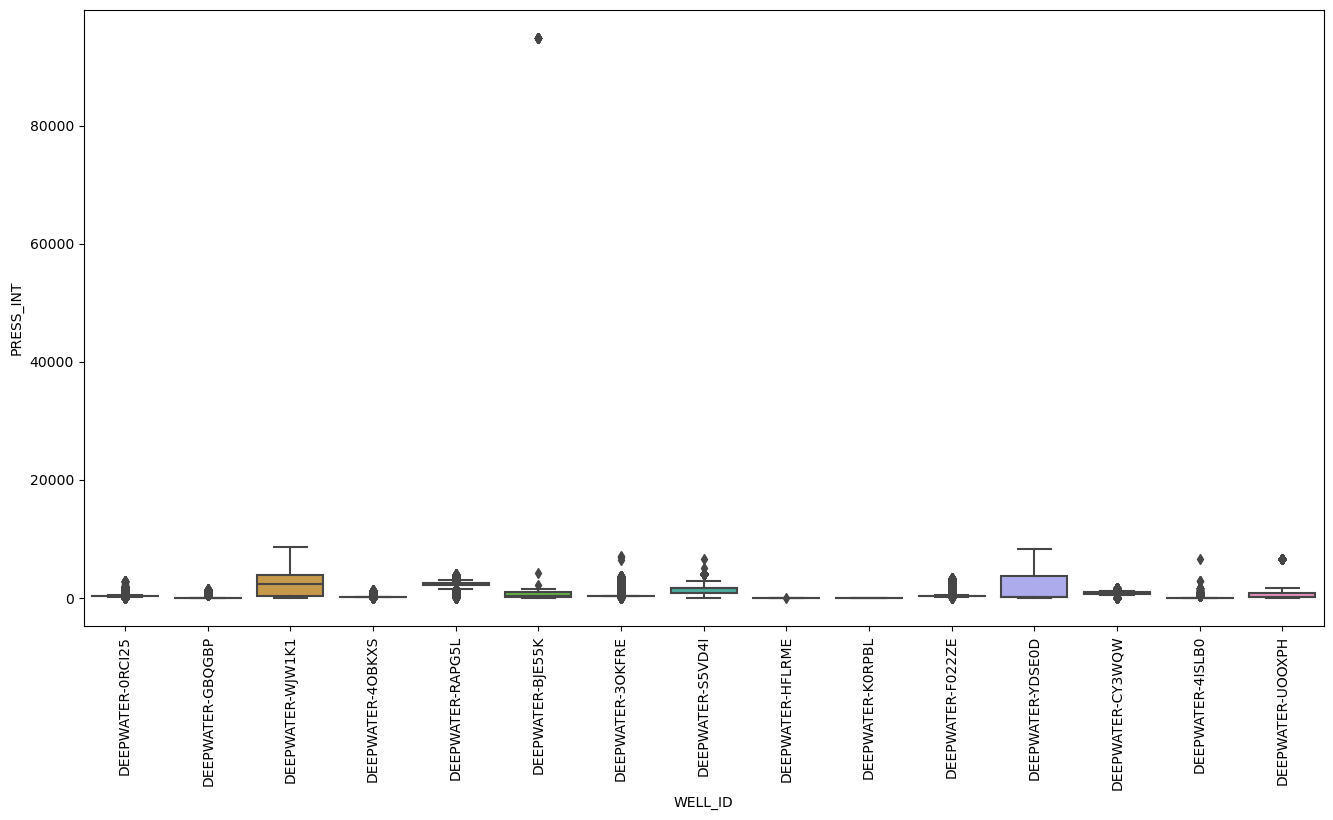

In [70]:
# Current variable 
box_plot(esp_test, 'WELL_ID', 'PRESS_INT')

## **2.3. Boxplots production data**

In [71]:
# Production data
prod_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14508 entries, 0 to 14507
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WELL_ID         14508 non-null  object 
 1   DATE            14508 non-null  object 
 2   BFPD            14503 non-null  float64
 3   BOPD            14462 non-null  float64
 4   BWPD            14504 non-null  float64
 5   MSCF            14484 non-null  float64
 6   BSW             14504 non-null  float64
 7   GOR(MSFC/BPPD)  14508 non-null  float64
 8   GLR(SCF/BFPD)   14508 non-null  float64
 9   API             14359 non-null  float64
 10  FREC(Hz)        9832 non-null   float64
 11  PIP(PSI)        9171 non-null   float64
 12  PROF_INTAKE     10200 non-null  float64
 13  AMPERAGE        11305 non-null  float64
 14  PUMP            14508 non-null  object 
 15  PSI_CAB         14308 non-null  float64
dtypes: float64(13), object(3)
memory usage: 1.8+ MB


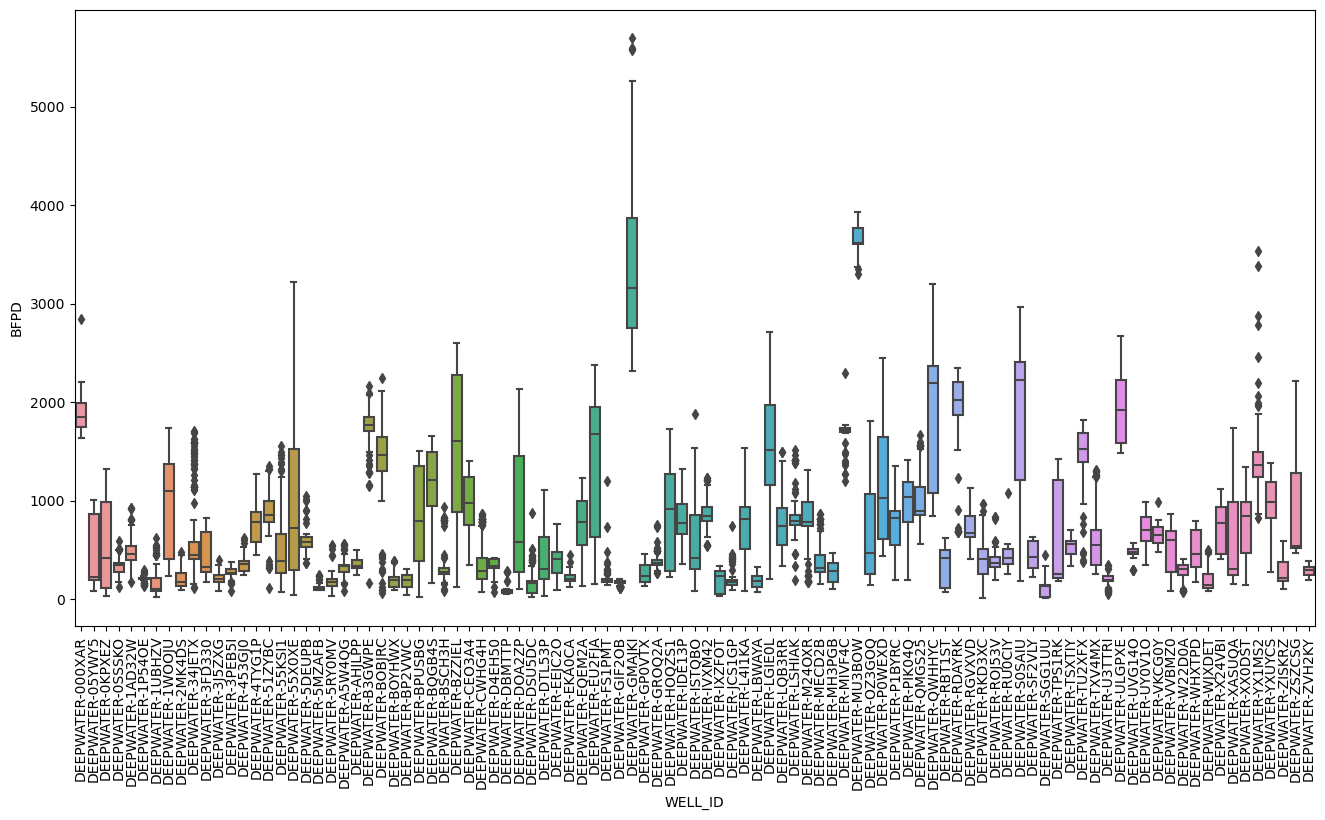

In [72]:
# Boxplot: liquid rate
box_plot(prod_train, 'WELL_ID', 'BFPD')

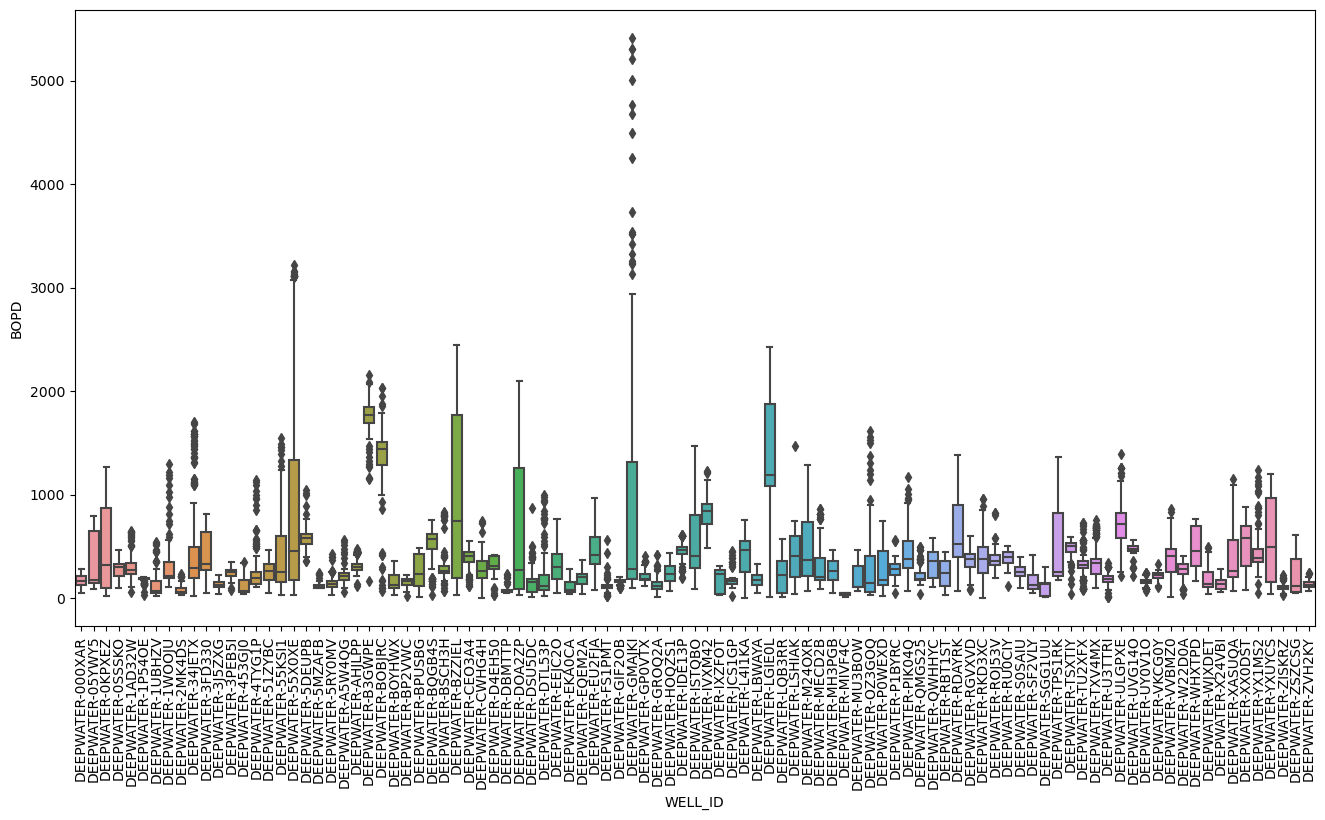

In [73]:
# Boxplot: oil rate
box_plot(prod_train, 'WELL_ID', 'BOPD')

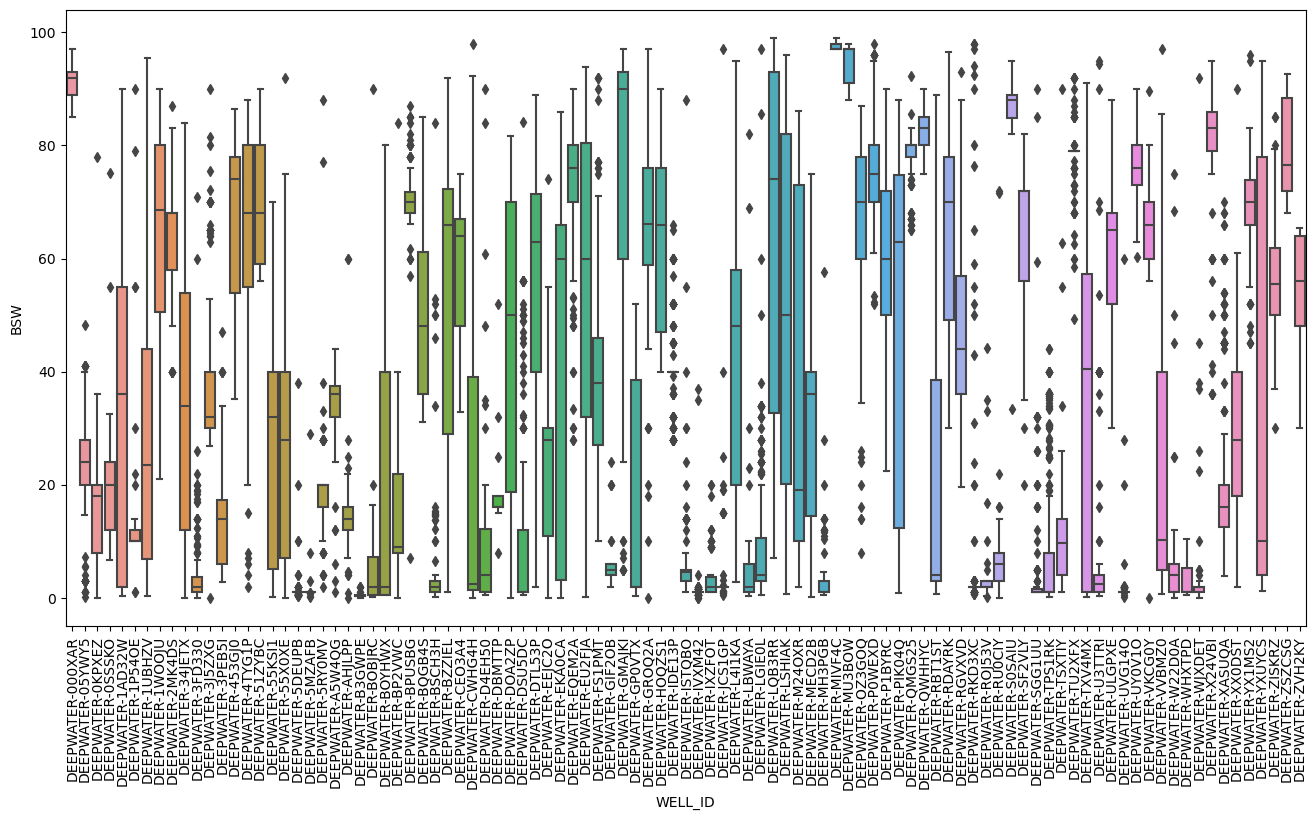

In [74]:
# Boxplot:  water cut
box_plot(prod_train, 'WELL_ID', 'BSW')

In [75]:
# Counting the wells with reported failure
wells_failure = esp_train[esp_train['WellFailure'] == 'yes']
len(wells_failure.WELL_ID.unique())

83

In [77]:
# Counting the wells with reported manual off
wells_manual_offs = esp_train[esp_train['WellFailure'] == 'Manual off']
len(wells_manual_offs.WELL_ID.unique())

23

In [78]:
# There are wells that have a reported failure and manual off as the well 'DEEPWATER-L4I1KA'
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-L4I1KA') & (esp_train['WellFailure'] == 'yes')]

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
920331,DEEPWATER-L4I1KA,2020-06-01 00:19:47,0.0,1687.0,0.0,1057.0,231.6,231.0,NaN,0.0,yes


In [79]:
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-L4I1KA') & (esp_train['WellFailure'] == 'Manual off')]

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
247140,DEEPWATER-L4I1KA,2020-02-20 00:25:38,43.400002,NaN,65.5,0.0,32.0,32.0,476.60001,0.0,Manual off


In [80]:
# Other wells with doble report: Wellfailure and manual off
#'DEEPWATER-CWHG4H'
#'DEEPWATER-TXV4MX'
#'DEEPWATER-ISTQBO'

# **3. Filtering ESP data**

## **3.1. Setting conditions to filter data**

In [50]:
# Posible situations for abnormal values
# 1. Frozen sensor
# 2. Station Shutdown 
# 3. Sensor out of calibration

In [51]:
# Ranges for each esp parameter where these values are still considered as NORMAL
esp_train_fil = esp_train[ (esp_train['CURRENT'] >= 0) & (esp_train['CURRENT'] <= 500) ]
#esp_train_fil = esp_train[ (esp_train['PRESS_DESC'] >= 0) & (esp_train['PRESS_DESC'] <= 4500) ]
#esp_train_fil = esp_train[ (esp_train['FREQUENCY'] >= 0) & (esp_train['FREQUENCY'] <= 65) ]
#esp_train_fil = esp_train[ (esp_train['PRESS_INTK'] >= 0) & (esp_train['PRESS_INTK'] <= 4500) ]
#esp_train_fil = esp_train[ (esp_train['TEMP_INT'] >= 0) & (esp_train['TEMP_INT'] <= 300) ]
#esp_train_fil = esp_train[ (esp_train['TEMP_MOT'] >= 0) & (esp_train['TEMP_MOT'] <= 350) ]
#esp_train_fil = esp_train[ (esp_train['VIBRATION'] >= 0) & (esp_train['VIBRATION'] <= 5) ]
#esp_train_fil = esp_train[ (esp_train['TEMP_INTK'] >= 0) & (esp_train['TEMP_INTK'] <= 300) ]


In [52]:
# After filtering values according CURRENT parameter, 3 recordings are lost respect to wellfailure=yes:
# 'DEEPWATER-DSU5DC'
# 'DEEPWATER-P0WEXD'
# 'DEEPWATER-EEJC2O'

# Aftering filter values acordding current parameter, 3 recordings are lost respect to wellfailure=manual off:
# 'DEEPWATER-TXV4MX'
# 'DEEPWATER-CWHG4H'

# These two well are not counted as wellfailure or manual off , they appear in the df but not with the label 'Manual off'
#'DEEPWATER-3FD330'
#'DEEPWATER-55KSI1'


In [53]:
# Total wells are losing their label as manual off or yes
# yes:  'DEEPWATER-DSU5DC', 'DEEPWATER-P0WEXD', 'DEEPWATER-EEJC2O'
# Manual off: # 'DEEPWATER-TXV4MX', # 'DEEPWATER-CWHG4H'
# These two well are not counted as wellfailure or manual off , they appear in the df but not with the label 'Manual off'
#'DEEPWATER-3FD330', #'DEEPWATER-55KSI1'

esp_train[esp_train['WELL_ID'] == 'DEEPWATER-DSU5DC'] # not filtered due to current null values when wellfailure=yes
esp_train[esp_train['WELL_ID'] == 'DEEPWATER-P0WEXD'] # not filtered due to current null values when wellfailure=yes
esp_train[esp_train['WELL_ID'] == 'DEEPWATER-EEJC2O'] # not filtered due to current null values when wellfailure=yes


,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
33,DEEPWATER-EEJC2O,2020-01-01 08:11:27,20.900000,4120.5996,62.0,316.89999,251.10001,277.70001,468.79999,0.300204,NaN
95,DEEPWATER-EEJC2O,2020-01-01 08:31:27,21.000000,4115.2998,62.0,316.29999,250.90001,277.70001,470.39999,0.300204,NaN
166,DEEPWATER-EEJC2O,2020-01-01 08:51:27,20.900000,4116.1001,62.0,317.09998,251.10001,277.70001,471.50000,0.400271,NaN
230,DEEPWATER-EEJC2O,2020-01-01 09:11:27,21.000000,4116.3999,62.0,317.19998,250.90001,277.70001,468.00000,0.200136,NaN
301,DEEPWATER-EEJC2O,2020-01-01 09:31:27,21.200001,4104.2998,62.0,316.09998,250.90001,277.70001,470.20001,0.300204,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7671,DEEPWATER-EEJC2O,2019-12-27 00:00:00,21.090000,4115.2000,62.0,323.89000,252.32000,279.53000,470.38000,0.300000,NaN
7672,DEEPWATER-EEJC2O,2019-12-28 00:00:00,20.970000,4109.6600,62.0,305.79000,252.59000,279.32000,470.49000,0.290000,NaN
7673,DEEPWATER-EEJC2O,2019-12-29 00:00:00,20.910000,4111.3300,62.0,309.95000,253.31000,279.74000,470.45000,0.300000,NaN
7674,DEEPWATER-EEJC2O,2019-12-30 00:00:00,20.860000,4114.7100,62.0,320.37000,253.07000,279.56000,470.57000,0.290000,NaN


In [54]:
# manual off: 'DEEPWATER-TXV4MX', 'DEEPWATER-CWHG4H', 'DEEPWATER-3FD330', 'DEEPWATER-55KSI1'
# not filtered due to current null values when wellfailure ='Manual off'
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-TXV4MX') & (esp_train['WellFailure'] == 'Manual off')]
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-CWHG4H') & (esp_train['WellFailure'] == 'Manual off')]
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-3FD330') & (esp_train['WellFailure'] == 'Manual off')]
esp_train[(esp_train['WELL_ID'] == 'DEEPWATER-55KSI1') & (esp_train['WellFailure'] == 'Manual off')]

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
5726,DEEPWATER-55KSI1,2020-02-02,NaN,4351.1997,NaN,468.19998,239.20001,273.89999,NaN,0.800543,Manual off


## 3.2 Filtering ESP Train data

In [35]:
# Applying proper filtering conditions in order to do not lose data
filt_2 = esp_train[(esp_train['CURRENT'] <= 500) | (esp_train['CURRENT'].isnull())]
filt_2_v2 = filt_2[(filt_2['FREQUENCY'] <= 200) | (filt_2['FREQUENCY'].isnull())]
filt_2_v3 = filt_2_v2[(filt_2_v2['TEMP_MOT'] <= 800) | (filt_2_v2['TEMP_MOT'].isnull())]
filt_2_v4 = filt_2_v3[(filt_2_v3['TEMP_INT'] <= 15000) | (filt_2_v3['WellFailure'] != 'yes') | (filt_2_v3['TEMP_INT'].isnull())]
filt_2_v5 = filt_2_v4[(filt_2_v4['VIBRATION'] <= 70000) | (filt_2_v4['WellFailure'] != 'yes') | (filt_2_v4['VIBRATION'].isnull())]
filt_2_v6 = filt_2_v5[(filt_2_v5['OUT_VOLT'] <= 500) | (filt_2_v5['OUT_VOLT'].isnull())]
filt_2_v7 = filt_2_v6[(filt_2_v6['PRESS_DESC'] < 90000) | (filt_2_v6['PRESS_DESC'].isnull()) | (filt_2_v6['WellFailure'].notnull())]
filt_2_v8 = filt_2_v7[(filt_2_v7['PRESS_INT'] <= 100000) | (filt_2_v7['PRESS_INT'].isnull()) | (filt_2_v7['WellFailure'].notnull())]
filt_2_v9 = filt_2_v8[(filt_2_v8['TEMP_MOT'] <= 700)  | (filt_2_v8['WellFailure'].notnull()) | (filt_2_v8['TEMP_MOT'].isnull())]
filt_2_v10 = filt_2_v9[(filt_2_v9['TEMP_INT'] <= 700)  | (filt_2_v9['WellFailure'].notnull()) | (filt_2_v9['TEMP_INT'].isnull())]

In [36]:
filt_2_v10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378508 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 767.1+ MB


In [37]:
# Counting wells to check if data is complete
len(filt_2_v10[filt_2_v10['WellFailure'] == 'yes'].WELL_ID.unique())

83

In [38]:
len(filt_2_v10[filt_2_v10['WellFailure'] == 'Manual off'].WELL_ID.unique())

23

In [39]:
# Final dataframe after filtering noise data
train_data = filt_2_v10.copy()
train_data

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
0,DEEPWATER-VVBMZ0,2020-01-01 00:00:00,4.480000,2659.0600,0.55,1966.80000,80.64000,105.57000,0.00000,2.550000,yes
1,DEEPWATER-VKCG0Y,2020-01-01 08:00:31,24.799999,4172.1997,54.00,460.50000,235.39999,279.09998,425.10001,0.200136,NaN
2,DEEPWATER-HOQZS1,2020-01-01 08:01:14,39.200001,4008.9998,59.00,354.20001,223.50000,280.19998,459.89999,NaN,NaN
3,DEEPWATER-IXZFOT,2020-01-01 08:01:54,20.900000,3996.2000,133.00,518.39996,243.50000,319.10001,304.00000,NaN,NaN
4,DEEPWATER-3PEB5I,2020-01-01 08:02:22,NaN,3742.3000,NaN,NaN,232.20000,276.39999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19114,DEEPWATER-ZSZCSG,2019-11-07 00:00:00,0.000000,0.0000,0.00,4127.67000,223.00000,223.24000,0.00000,0.110000,NaN
19115,DEEPWATER-ZSZCSG,2019-11-08 00:00:00,0.000000,0.0000,0.00,4127.75000,222.98000,223.20000,0.00000,0.110000,NaN
19116,DEEPWATER-ZSZCSG,2019-11-09 00:00:00,0.000000,0.0000,0.00,4125.95000,222.84000,223.11000,0.00000,0.150000,NaN
19117,DEEPWATER-ZSZCSG,2019-11-10 00:00:00,0.000000,0.0000,0.00,4126.17000,222.79000,223.12000,0.00000,0.110000,NaN


In [60]:
# Plot to check the distribution of the filtered data
#box_plot(train_data, 'WELL_ID', 'VIBRATION', 2000)

## 3.2 Analyzing filtered data

<AxesSubplot:xlabel='DATE', ylabel='PRESS_DESC'>

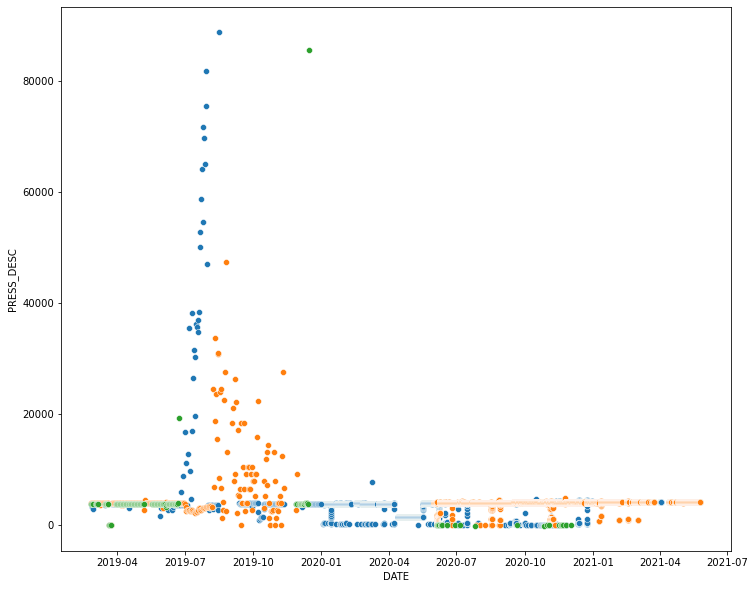

In [61]:
# Descharge Pressure

fig = plt.subplots(figsize=(12, 10))
well_bp = train_data[train_data['WELL_ID'] == 'DEEPWATER-BP2VWC']
well_rb = train_data[train_data['WELL_ID'] == 'DEEPWATER-RBT1ST']
well_wj = train_data[train_data['WELL_ID'] == 'DEEPWATER-WJXDET']
well_tp = train_data[train_data['WELL_ID'] == 'DEEPWATER-TPS1RK']
sns.scatterplot(x='DATE', y='PRESS_DESC', data=well_bp)
sns.scatterplot(x='DATE', y='PRESS_DESC', data=well_rb)
sns.scatterplot(x='DATE', y='PRESS_DESC', data=well_wj)
# transformar a 20000

<AxesSubplot:xlabel='DATE', ylabel='PRESS_INT'>

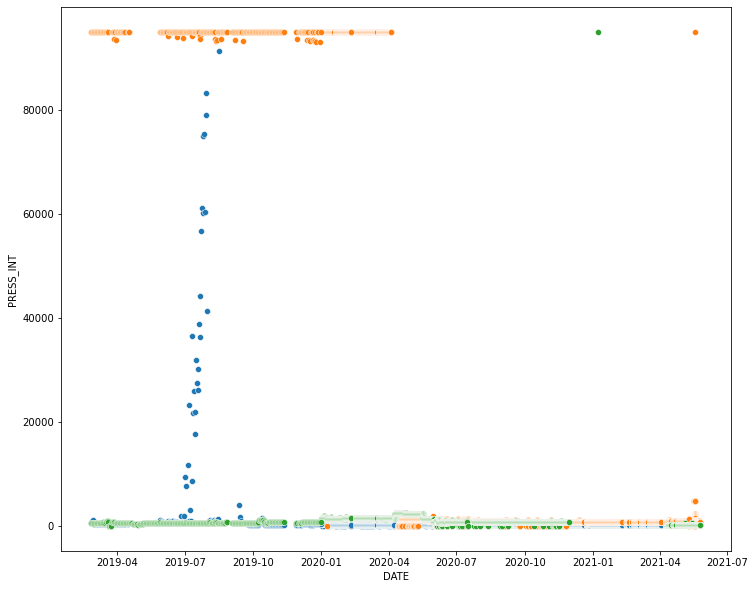

In [62]:
# Intake Pressure

fig = plt.subplots(figsize=(12, 10))
well_0= train_data[train_data['WELL_ID'] == 'DEEPWATER-05YWY5']
well_ek = train_data[train_data['WELL_ID'] == 'DEEPWATER-EKA0CA']
sns.scatterplot(x='DATE', y='PRESS_INT', data=well_bp)
sns.scatterplot(x='DATE', y='PRESS_INT', data=well_0)
sns.scatterplot(x='DATE', y='PRESS_INT', data=well_ek)
# transformar a 20000

<AxesSubplot:xlabel='DATE', ylabel='TEMP_INT'>

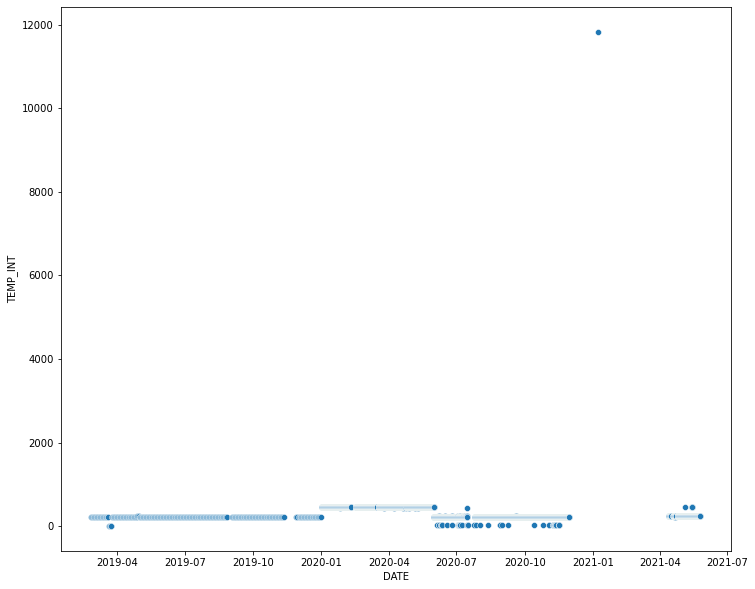

In [63]:
# Intake Temperature

fig = plt.subplots(figsize=(12, 10))
well_ek = train_data[train_data['WELL_ID'] == 'DEEPWATER-EKA0CA']
sns.scatterplot(x='DATE', y='TEMP_INT', data=well_ek)

## 3.3 Filtering Test ESP data

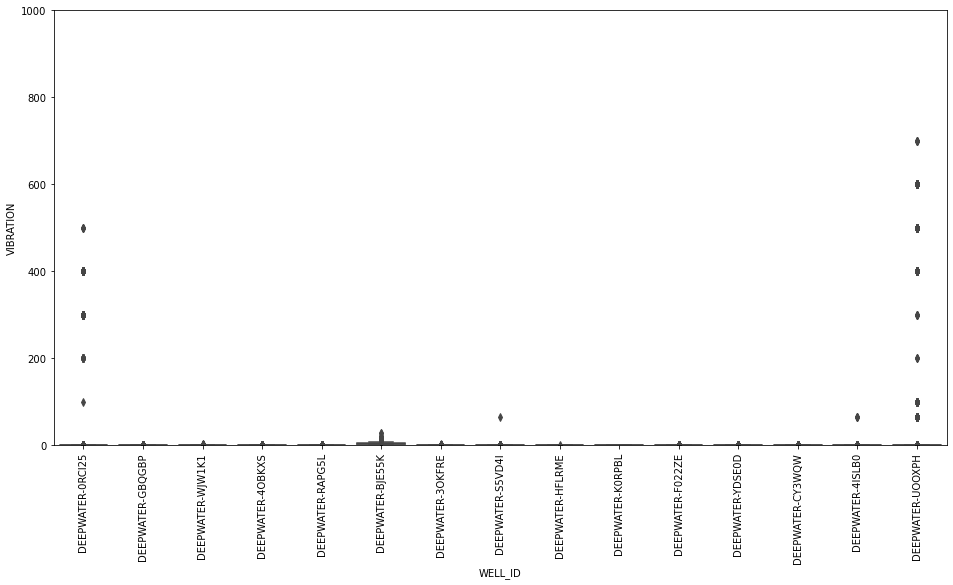

In [124]:
box_plot(esp_test, 'WELL_ID', 'VIBRATION', 1000)

# 4. Outliers treatment

## 4.1 Train Data

In [64]:
# As you saw previously, there are still outliers in our dataset so the have to be treated.

In [40]:
# Define upper limits to replace outliers
transf_train = train_data.copy()
transf_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378508 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   WELL_ID      object        
 1   DATE         datetime64[ns]
 2   CURRENT      float64       
 3   PRESS_DESC   float64       
 4   FREQUENCY    float64       
 5   PRESS_INT    float64       
 6   TEMP_INT     float64       
 7   TEMP_MOT     float64       
 8   OUT_VOLT     float64       
 9   VIBRATION    float64       
 10  WellFailure  object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 767.1+ MB


In [41]:
# Transforming values
transf_train['PRESS_DESC'] = np.where(transf_train['PRESS_DESC'] > 20000, 20000, transf_train['PRESS_DESC'])
transf_train['PRESS_INT'] = np.where(transf_train['PRESS_INT'] > 20000, 20000, transf_train['PRESS_INT'])
transf_train['TEMP_INT'] = np.where(transf_train['TEMP_INT'] > 800, 700, transf_train['TEMP_INT'])
transf_train['VIBRATION'] = np.where(transf_train['VIBRATION'] > 1000, 1000, transf_train['VIBRATION'])

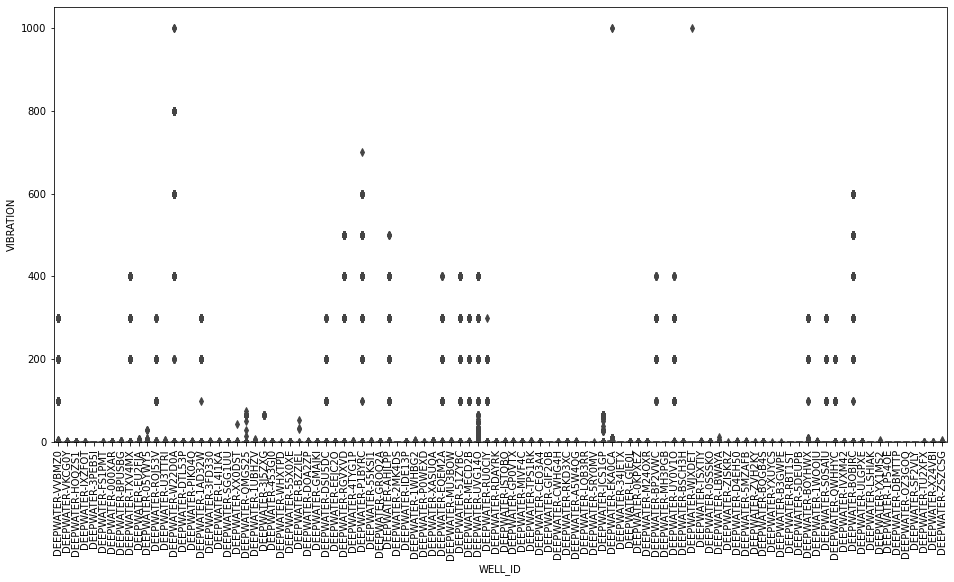

In [42]:
# Checking variables distribution after transformation
box_plot(transf_train, 'WELL_ID', 'VIBRATION')

<AxesSubplot:xlabel='DATE', ylabel='PRESS_DESC'>

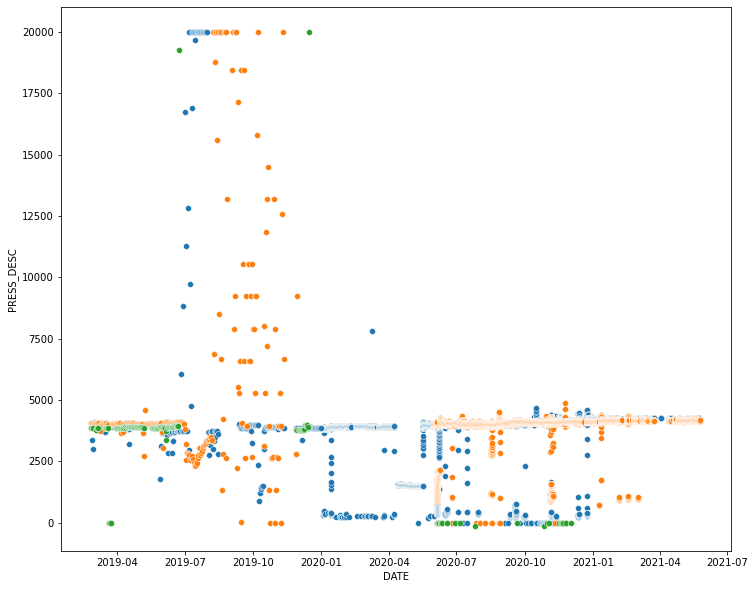

In [68]:
fig = plt.subplots(figsize=(12, 10))
wells_bp = transf_train[transf_train['WELL_ID'] == 'DEEPWATER-BP2VWC']
wells_rb = transf_train[transf_train['WELL_ID'] == 'DEEPWATER-RBT1ST']
wells_wj = transf_train[transf_train['WELL_ID'] == 'DEEPWATER-WJXDET']
wells_tp = transf_train[transf_train['WELL_ID'] == 'DEEPWATER-TPS1RK']
sns.scatterplot(x='DATE', y='PRESS_DESC', data=wells_bp)
sns.scatterplot(x='DATE', y='PRESS_DESC', data=wells_rb)
sns.scatterplot(x='DATE', y='PRESS_DESC', data=wells_wj)
# transformar a 20000

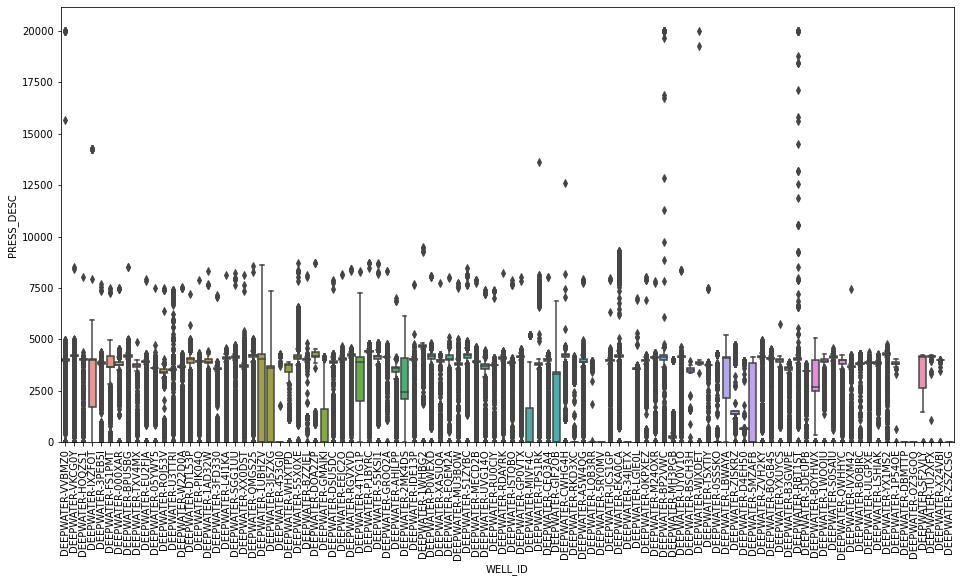

In [69]:
box_plot(transf_train, 'WELL_ID', 'PRESS_DESC')

## 4.2 Test Data

In [110]:
transf_test = esp_test.copy()

In [125]:
# Transforming values

transf_test['PRESS_INT'] = np.where(transf_test['PRESS_INT'] > 20000, 20000, transf_test['PRESS_INT'])
transf_test['TEMP_INT'] = np.where(transf_test['TEMP_INT'] > 800, 700, transf_test['TEMP_INT'])
transf_test['TEMP_MOT'] = np.where(transf_test['TEMP_MOT'] > 800, 700, transf_test['TEMP_MOT'])
transf_test['VIBRATION'] = np.where(transf_test['VIBRATION'] > 1000, 1000, transf_test['VIBRATION'])

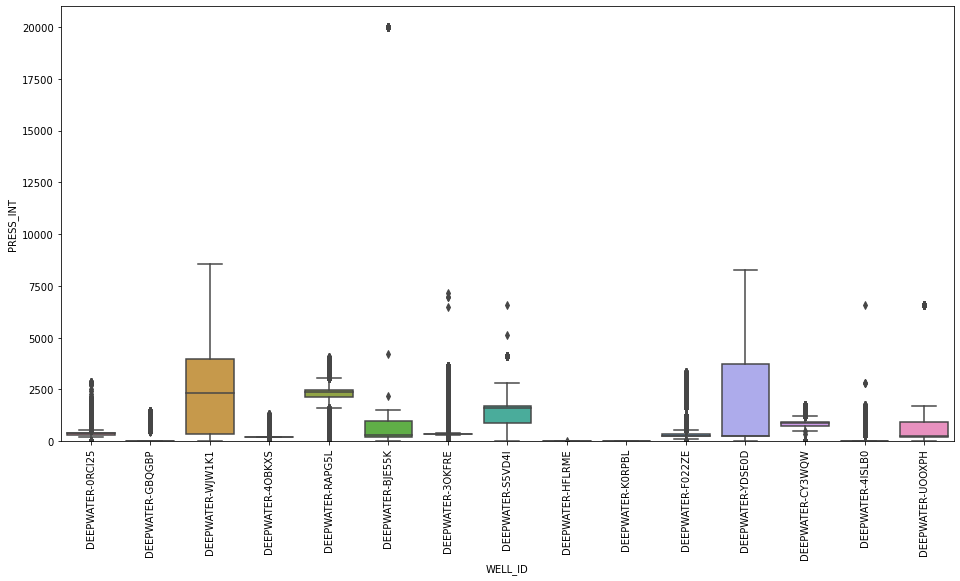

In [129]:
box_plot(transf_test, 'WELL_ID', 'PRESS_INT')

# 5. Filling null values

In [177]:
# Making a copy of the transf_data
train_df = transf_train.copy()
train_df

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
0,DEEPWATER-VVBMZ0,2020-01-01 00:00:00,4.480000,2659.0600,0.55,1966.80000,80.64000,105.57000,0.00000,2.550000,yes
1,DEEPWATER-VKCG0Y,2020-01-01 08:00:31,24.799999,4172.1997,54.00,460.50000,235.39999,279.09998,425.10001,0.200136,NaN
2,DEEPWATER-HOQZS1,2020-01-01 08:01:14,39.200001,4008.9998,59.00,354.20001,223.50000,280.19998,459.89999,NaN,NaN
3,DEEPWATER-IXZFOT,2020-01-01 08:01:54,20.900000,3996.2000,133.00,518.39996,243.50000,319.10001,304.00000,NaN,NaN
4,DEEPWATER-3PEB5I,2020-01-01 08:02:22,NaN,3742.3000,NaN,NaN,232.20000,276.39999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19114,DEEPWATER-ZSZCSG,2019-11-07 00:00:00,0.000000,0.0000,0.00,4127.67000,223.00000,223.24000,0.00000,0.110000,NaN
19115,DEEPWATER-ZSZCSG,2019-11-08 00:00:00,0.000000,0.0000,0.00,4127.75000,222.98000,223.20000,0.00000,0.110000,NaN
19116,DEEPWATER-ZSZCSG,2019-11-09 00:00:00,0.000000,0.0000,0.00,4125.95000,222.84000,223.11000,0.00000,0.150000,NaN
19117,DEEPWATER-ZSZCSG,2019-11-10 00:00:00,0.000000,0.0000,0.00,4126.17000,222.79000,223.12000,0.00000,0.110000,NaN


## 5.1.1 Filling WellFailure column - Train dataset

In [176]:

# Filling column WellFailure
train_df['WellFailure'].fillna('No', inplace=True)
train_df.isna().sum()

WELL_ID              0
DATE                 0
CURRENT         506577
PRESS_DESC      546089
FREQUENCY       312737
PRESS_INT       269454
TEMP_INT        399864
TEMP_MOT        303974
OUT_VOLT       8024387
VIBRATION       592045
WellFailure          0
dtype: int64

## 5.1.2 Filling other columns - Train dataset

## 5.1.2.1 Encoding categorical variables: WELL_ID and WellFailure

In [45]:
# Encoding categorical variables
enc = OrdinalEncoder()
enc.fit(train_df[["WELL_ID","WellFailure"]])
train_df[["WELL_ID","WellFailure"]] = enc.transform(train_df[["WELL_ID","WellFailure"]])

In [46]:
# Checking results
train_df

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
0,88.0,2020-01-01 00:00:00,4.480000,2659.0600,0.55,1966.80000,80.64000,105.57000,0.00000,2.550000,2.0
1,87.0,2020-01-01 08:00:31,24.799999,4172.1997,54.00,460.50000,235.39999,279.09998,425.10001,0.200136,1.0
2,48.0,2020-01-01 08:01:14,39.200001,4008.9998,59.00,354.20001,223.50000,280.19998,459.89999,NaN,1.0
3,52.0,2020-01-01 08:01:54,20.900000,3996.2000,133.00,518.39996,243.50000,319.10001,304.00000,NaN,1.0
4,13.0,2020-01-01 08:02:22,NaN,3742.3000,NaN,NaN,232.20000,276.39999,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19114,98.0,2019-11-07 00:00:00,0.000000,0.0000,0.00,4127.67000,223.00000,223.24000,0.00000,0.110000,1.0
19115,98.0,2019-11-08 00:00:00,0.000000,0.0000,0.00,4127.75000,222.98000,223.20000,0.00000,0.110000,1.0
19116,98.0,2019-11-09 00:00:00,0.000000,0.0000,0.00,4125.95000,222.84000,223.11000,0.00000,0.150000,1.0
19117,98.0,2019-11-10 00:00:00,0.000000,0.0000,0.00,4126.17000,222.79000,223.12000,0.00000,0.110000,1.0


In [41]:
# Variable WellFailure = 2 is equivalent to label 'yes'
len(train_df[train_df['WellFailure'] == 2].WELL_ID.unique())

83

In [43]:
# Variable WellFailure = 0 is equivalent to label 'Manual off'
len(train_df[train_df['WellFailure'] == 0].WELL_ID.unique())

23

In [76]:
# Variable WellFailure = 1 is equivalent to label 'No'

In [44]:
#Checking new well names
train_df.WELL_ID.unique()

array([88., 87., 48., 52., 13., 43.,  0., 28., 82., 42.,  1., 74., 83.,
       89., 38., 67.,  4., 11., 54., 78., 94., 68.,  6., 12., 14., 90.,
       18., 31., 36., 45., 37., 39., 72., 15., 66., 17., 47., 23.,  9.,
       49.,  7., 65., 93., 41., 63., 16., 60., 85., 75., 71., 50., 46.,
       62., 79., 32., 44., 33., 73., 22., 57., 21., 53., 40., 10., 56.,
        2., 59., 27., 61., 86., 30., 91., 80.,  3., 55., 97., 34., 20.,
       99., 29., 96., 24., 70., 19., 26.,  8., 76., 69., 51., 25., 84.,
       58., 95.,  5., 35., 64., 77., 81., 92., 98.])

## 5.1.2.2 Using MICE to fill null values

In [180]:
# Selecting only numerical variables 
num_data = train_df.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9]]

In [181]:
num_data

,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION
0,4.480000,2659.0600,0.55,1966.80000,80.64000,105.57000,0.00000,2.550000
1,24.799999,4172.1997,54.00,460.50000,235.39999,279.09998,425.10001,0.200136
2,39.200001,4008.9998,59.00,354.20001,223.50000,280.19998,459.89999,NaN
3,20.900000,3996.2000,133.00,518.39996,243.50000,319.10001,304.00000,NaN
4,NaN,3742.3000,NaN,NaN,232.20000,276.39999,NaN,NaN
...,...,...,...,...,...,...,...,...
19114,0.000000,0.0000,0.00,4127.67000,223.00000,223.24000,0.00000,0.110000
19115,0.000000,0.0000,0.00,4127.75000,222.98000,223.20000,0.00000,0.110000
19116,0.000000,0.0000,0.00,4125.95000,222.84000,223.11000,0.00000,0.150000
19117,0.000000,0.0000,0.00,4126.17000,222.79000,223.12000,0.00000,0.110000


In [182]:
# Using MICE to fill null values
mice_impute = IterativeImputer()
traindatafill = mice_impute.fit_transform(num_data)

C:\Users\karol\miniconda3\envs\see_env\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [183]:
# Converting traindatafill to dataframe
train_fill = pd.DataFrame(traindatafill)
train_fill.head()

,0,1,2,3,4,5,6,7
0,4.480000,2659.0600,0.550000,1966.800000,80.64000,105.57000,0.000000,2.550000
1,24.799999,4172.1997,54.000000,460.500000,235.39999,279.09998,425.100010,0.200136
2,39.200001,4008.9998,59.000000,354.200010,223.50000,280.19998,459.899990,2.322395
3,20.900000,3996.2000,133.000000,518.399960,243.50000,319.10001,304.000000,-37.040874
4,35.797105,3742.3000,55.674079,605.211095,232.20000,276.39999,404.062201,0.683527


In [184]:
# Renaming columns
train_fill = train_fill.rename(columns={0:'CURRENT', 1:'PRESS_DESC', 2:'FREQUENCY', 3:'PRESS_INT', 4:'TEMP_INT',
                                       5:'TEMP_MOT', 6:'OUT_VOLT', 7:'VIBRATION'})

In [185]:
# Checking null values
train_fill.isna().sum()

CURRENT       0
PRESS_DESC    0
FREQUENCY     0
PRESS_INT     0
TEMP_INT      0
TEMP_MOT      0
OUT_VOLT      0
VIBRATION     0
dtype: int64

In [186]:
train_fill.head()

,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION
0,4.480000,2659.0600,0.550000,1966.800000,80.64000,105.57000,0.000000,2.550000
1,24.799999,4172.1997,54.000000,460.500000,235.39999,279.09998,425.100010,0.200136
2,39.200001,4008.9998,59.000000,354.200010,223.50000,280.19998,459.899990,2.322395
3,20.900000,3996.2000,133.000000,518.399960,243.50000,319.10001,304.000000,-37.040874
4,35.797105,3742.3000,55.674079,605.211095,232.20000,276.39999,404.062201,0.683527


In [187]:
date= train_df[['DATE', 'WELL_ID', 'WellFailure']].reset_index()
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378508 entries, 0 to 8378507
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   index        int64         
 1   DATE         datetime64[ns]
 2   WELL_ID      object        
 3   WellFailure  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 255.7+ MB


In [188]:
# Adding time column
train_fill = pd.concat([train_fill, date], axis=1)

In [189]:
train_fill = train_fill[['DATE', 'WELL_ID', 'CURRENT', 'PRESS_DESC', 'FREQUENCY', 
                         'PRESS_INT', 'TEMP_INT', 'TEMP_MOT', 'OUT_VOLT', 'VIBRATION', 'WellFailure']]

In [190]:
train_fill.head()

,DATE,WELL_ID,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
0,2020-01-01 00:00:00,DEEPWATER-VVBMZ0,4.480000,2659.0600,0.550000,1966.800000,80.64000,105.57000,0.000000,2.550000,yes
1,2020-01-01 08:00:31,DEEPWATER-VKCG0Y,24.799999,4172.1997,54.000000,460.500000,235.39999,279.09998,425.100010,0.200136,NaN
2,2020-01-01 08:01:14,DEEPWATER-HOQZS1,39.200001,4008.9998,59.000000,354.200010,223.50000,280.19998,459.899990,2.322395,NaN
3,2020-01-01 08:01:54,DEEPWATER-IXZFOT,20.900000,3996.2000,133.000000,518.399960,243.50000,319.10001,304.000000,-37.040874,NaN
4,2020-01-01 08:02:22,DEEPWATER-3PEB5I,35.797105,3742.3000,55.674079,605.211095,232.20000,276.39999,404.062201,0.683527,NaN


## 5.2.1 Filling other columns - Test dataset

In [191]:
test_df = transf_test.copy()
test_df.head()

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
0,DEEPWATER-0RCI25,2020-01-01 08:06:20,NaN,4032.7000,53.000000,NaN,225.700010,269.399990,NaN,NaN,NaN
1,DEEPWATER-GBQGBP,2020-01-01 08:08:10,NaN,NaN,59.900002,NaN,NaN,NaN,NaN,NaN,NaN
2,DEEPWATER-WJW1K1,2020-01-01 08:16:07,36.799999,4066.3999,65.000000,629.99994,237.700000,292.300020,438.60001,0.300204,NaN
3,DEEPWATER-4OBKXS,2020-01-01 08:17:34,51.299999,0.0000,49.000000,0.00000,-0.000002,-0.000002,398.00000,0.000000,NaN
4,DEEPWATER-RAPG5L,2020-01-01 08:20:00,NaN,4251.5000,57.000000,393.20001,235.899990,280.600010,NaN,0.700475,NaN


In [136]:
# Encoding categorical variables
enc = OrdinalEncoder()
enc.fit(test_df[["WELL_ID"]])
test_df[["WELL_ID"]] = enc.transform(test_df[["WELL_ID"]])

In [137]:
test_df

,WELL_ID,DATE,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
0,0.0,2020-01-01 08:06:20,NaN,4032.7000,53.000000,NaN,225.700010,269.399990,NaN,NaN,NaN
1,7.0,2020-01-01 08:08:10,NaN,NaN,59.900002,NaN,NaN,NaN,NaN,NaN,NaN
2,13.0,2020-01-01 08:16:07,36.799999,4066.3999,65.000000,629.99994,237.700000,292.300020,438.60001,0.300204,NaN
3,3.0,2020-01-01 08:17:34,51.299999,0.0000,49.000000,0.00000,-0.000002,-0.000002,398.00000,0.000000,NaN
4,10.0,2020-01-01 08:20:00,NaN,4251.5000,57.000000,393.20001,235.899990,280.600010,NaN,0.700475,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3623,14.0,2019-12-27 00:00:00,29.890000,0.0000,57.000000,229.22000,244.910000,265.410000,482.14000,0.270000,NaN
3624,14.0,2019-12-28 00:00:00,29.890000,0.0000,57.000000,229.45000,244.930000,265.360000,482.01000,0.270000,NaN
3625,14.0,2019-12-29 00:00:00,29.880000,0.0000,57.000000,229.53000,244.930000,265.370000,482.23000,0.270000,NaN
3626,14.0,2019-12-30 00:00:00,29.890000,0.0000,57.000000,229.65000,244.970000,265.320000,482.15000,0.270000,NaN


In [192]:
# Selecting only numerical variables 
num_data_test = test_df.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9]]
num_data_test

,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION
0,NaN,4032.7000,53.000000,NaN,225.700010,269.399990,NaN,NaN
1,NaN,NaN,59.900002,NaN,NaN,NaN,NaN,NaN
2,36.799999,4066.3999,65.000000,629.99994,237.700000,292.300020,438.60001,0.300204
3,51.299999,0.0000,49.000000,0.00000,-0.000002,-0.000002,398.00000,0.000000
4,NaN,4251.5000,57.000000,393.20001,235.899990,280.600010,NaN,0.700475
...,...,...,...,...,...,...,...,...
3623,29.890000,0.0000,57.000000,229.22000,244.910000,265.410000,482.14000,0.270000
3624,29.890000,0.0000,57.000000,229.45000,244.930000,265.360000,482.01000,0.270000
3625,29.880000,0.0000,57.000000,229.53000,244.930000,265.370000,482.23000,0.270000
3626,29.890000,0.0000,57.000000,229.65000,244.970000,265.320000,482.15000,0.270000


In [193]:
# Using MICE to fill null values
mice_impute = IterativeImputer()
testdatafill = mice_impute.fit_transform(num_data_test)

C:\Users\karol\miniconda3\envs\see_env\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [194]:
# Converting traindatafill to dataframe
test_fill = pd.DataFrame(testdatafill)
test_fill.head()

,0,1,2,3,4,5,6,7
0,32.630668,4032.700000,53.000000,1094.124282,225.700010,269.399990,368.393351,0.780524
1,30.371455,3082.609511,59.900002,757.590405,190.185364,197.049294,421.093662,1.524148
2,36.799999,4066.399900,65.000000,629.999940,237.700000,292.300020,438.600010,0.300204
3,51.299999,0.000000,49.000000,0.000000,-0.000002,-0.000002,398.000000,0.000000
4,38.232807,4251.500000,57.000000,393.200010,235.899990,280.600010,381.433594,0.700475


In [195]:
# Renaming columns
test_fill = test_fill.rename(columns={0:'CURRENT', 1:'PRESS_DESC', 2:'FREQUENCY', 3:'PRESS_INT', 4:'TEMP_INT',
                                       5:'TEMP_MOT', 6:'OUT_VOLT', 7:'VIBRATION'})

In [196]:
# Checking null values
test_fill.isna().sum()

CURRENT       0
PRESS_DESC    0
FREQUENCY     0
PRESS_INT     0
TEMP_INT      0
TEMP_MOT      0
OUT_VOLT      0
VIBRATION     0
dtype: int64

In [197]:
# Selecting date and wellfailure columns
cols = test_df[['WELL_ID', 'DATE', 'WellFailure']].reset_index()
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143020 entries, 0 to 1143019
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   index        1143020 non-null  int64         
 1   WELL_ID      1143020 non-null  object        
 2   DATE         1143020 non-null  datetime64[ns]
 3   WellFailure  0 non-null        float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 34.9+ MB


In [198]:
# Adding time and wellfailure columns
test_fill = pd.concat([test_fill, cols], axis=1)

In [199]:
test_fill = test_fill[['DATE', 'WELL_ID', 'CURRENT', 'PRESS_DESC', 'FREQUENCY', 
                         'PRESS_INT', 'TEMP_INT', 'TEMP_MOT', 'OUT_VOLT', 'VIBRATION', 'WellFailure']]

In [200]:
test_fill.head()

,DATE,WELL_ID,CURRENT,PRESS_DESC,FREQUENCY,PRESS_INT,TEMP_INT,TEMP_MOT,OUT_VOLT,VIBRATION,WellFailure
0,2020-01-01 08:06:20,DEEPWATER-0RCI25,32.630668,4032.700000,53.000000,1094.124282,225.700010,269.399990,368.393351,0.780524,NaN
1,2020-01-01 08:08:10,DEEPWATER-GBQGBP,30.371455,3082.609511,59.900002,757.590405,190.185364,197.049294,421.093662,1.524148,NaN
2,2020-01-01 08:16:07,DEEPWATER-WJW1K1,36.799999,4066.399900,65.000000,629.999940,237.700000,292.300020,438.600010,0.300204,NaN
3,2020-01-01 08:17:34,DEEPWATER-4OBKXS,51.299999,0.000000,49.000000,0.000000,-0.000002,-0.000002,398.000000,0.000000,NaN
4,2020-01-01 08:20:00,DEEPWATER-RAPG5L,38.232807,4251.500000,57.000000,393.200010,235.899990,280.600010,381.433594,0.700475,NaN


# 6. Prediction

## 6.1 Random Forest

In [201]:
# Drop FREQUENCY & OUT_VOLT columns
train = train_fill.drop(['FREQUENCY', 'OUT_VOLT'], axis=1)
train.head()

,DATE,WELL_ID,CURRENT,PRESS_DESC,PRESS_INT,TEMP_INT,TEMP_MOT,VIBRATION,WellFailure
0,2020-01-01 00:00:00,DEEPWATER-VVBMZ0,4.480000,2659.0600,1966.800000,80.64000,105.57000,2.550000,yes
1,2020-01-01 08:00:31,DEEPWATER-VKCG0Y,24.799999,4172.1997,460.500000,235.39999,279.09998,0.200136,NaN
2,2020-01-01 08:01:14,DEEPWATER-HOQZS1,39.200001,4008.9998,354.200010,223.50000,280.19998,2.322395,NaN
3,2020-01-01 08:01:54,DEEPWATER-IXZFOT,20.900000,3996.2000,518.399960,243.50000,319.10001,-37.040874,NaN
4,2020-01-01 08:02:22,DEEPWATER-3PEB5I,35.797105,3742.3000,605.211095,232.20000,276.39999,0.683527,NaN


In [202]:
train = train.set_index('DATE')

In [203]:
test = test_fill.drop(['FREQUENCY', 'OUT_VOLT'], axis=1)
test.head()

,DATE,WELL_ID,CURRENT,PRESS_DESC,PRESS_INT,TEMP_INT,TEMP_MOT,VIBRATION,WellFailure
0,2020-01-01 08:06:20,DEEPWATER-0RCI25,32.630668,4032.700000,1094.124282,225.700010,269.399990,0.780524,NaN
1,2020-01-01 08:08:10,DEEPWATER-GBQGBP,30.371455,3082.609511,757.590405,190.185364,197.049294,1.524148,NaN
2,2020-01-01 08:16:07,DEEPWATER-WJW1K1,36.799999,4066.399900,629.999940,237.700000,292.300020,0.300204,NaN
3,2020-01-01 08:17:34,DEEPWATER-4OBKXS,51.299999,0.000000,0.000000,-0.000002,-0.000002,0.000000,NaN
4,2020-01-01 08:20:00,DEEPWATER-RAPG5L,38.232807,4251.500000,393.200010,235.899990,280.600010,0.700475,NaN


In [204]:
test = test.set_index('DATE')

In [211]:
# Defining x and y train variables
x_train = train.drop('WellFailure', axis=1)
y_train = train['WellFailure']

In [214]:
x_test = test.drop('WellFailure', axis=1)
y_test = test['WellFailure']

In [217]:
# Random forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

ValueError: could not convert string to float: 'DEEPWATER-VVBMZ0'

In [164]:
# predictions
rfc_predict = rfc.predict(x_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [152]:
# Evaluating performance
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

SyntaxError: invalid character '’' (U+2019) (Temp/ipykernel_16728/761768582.py, line 2)

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

## 6.2 XGBoost

## 6.3 Bagging Classifier